# Artigos 01 e 02 - descrevendo o modelo de negócios e investigando os dados crus

In [2]:
#importando bibliotecas
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
#importando dados do csv para o dataframe
df = pd.read_csv('vendasBienio20222023Incognito.csv', sep = ";", low_memory=False)
df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Index           199177 non-null  int64 
 1   Date            199177 non-null  object
 2   Store ID        199177 non-null  int64 
 3   Category        199177 non-null  object
 4   Sale ID         199177 non-null  int64 
 5   Status          199177 non-null  object
 6   Payment Type    198324 non-null  object
 7   Place or Sale   199177 non-null  object
 8   Product         199177 non-null  object
 9   Product ID      199177 non-null  object
 10  Payment Method  71311 non-null   object
 11  Revenues        199177 non-null  object
 12  Products        199177 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 103.9 MB


In [4]:
# arquivo veio com duas colunas de índice, eliminando redundância:
df = df.drop(columns='Index')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            199177 non-null  object
 1   Store ID        199177 non-null  int64 
 2   Category        199177 non-null  object
 3   Sale ID         199177 non-null  int64 
 4   Status          199177 non-null  object
 5   Payment Type    198324 non-null  object
 6   Place or Sale   199177 non-null  object
 7   Product         199177 non-null  object
 8   Product ID      199177 non-null  object
 9   Payment Method  71311 non-null   object
 10  Revenues        199177 non-null  object
 11  Products        199177 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 102.4 MB


## Ajustando a tipagem das colunas

In [5]:
# ajustando a coluna date para tipo datetime:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# ajustando a coluna revenues, removendo o cifrão e tipando como float
df['Revenues'] = df['Revenues'].apply(lambda x: x.replace('$',''))
df['Revenues'] = df['Revenues'].astype('float')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199177 non-null  datetime64[ns]
 1   Store ID        199177 non-null  int64         
 2   Category        199177 non-null  object        
 3   Sale ID         199177 non-null  int64         
 4   Status          199177 non-null  object        
 5   Payment Type    198324 non-null  object        
 6   Place or Sale   199177 non-null  object        
 7   Product         199177 non-null  object        
 8   Product ID      199177 non-null  object        
 9   Payment Method  71311 non-null   object        
 10  Revenues        199177 non-null  float64       
 11  Products        199177 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 82.2 MB


In [7]:
#reduzindo o tamanho de armazenamento para colunas com números inteiros e floats
ints = df.select_dtypes(include=['int64','int32','int16']).columns
df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
floats = df.select_dtypes(include=['float']).columns
df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199177 non-null  datetime64[ns]
 1   Store ID        199177 non-null  int16         
 2   Category        199177 non-null  object        
 3   Sale ID         199177 non-null  int32         
 4   Status          199177 non-null  object        
 5   Payment Type    198324 non-null  object        
 6   Place or Sale   199177 non-null  object        
 7   Product         199177 non-null  object        
 8   Product ID      199177 non-null  object        
 9   Payment Method  71311 non-null   object        
 10  Revenues        199177 non-null  float32       
 11  Products        199177 non-null  int8          
dtypes: datetime64[ns](1), float32(1), int16(1), int32(1), int8(1), object(7)
memory usage: 78.2 MB


## Usando o tipo de dados category

In [8]:
# usando dtype categórico para colunas com strings, a fim de economizar espaço - pois as colunas com string, nesse df, são atributos categóricos com dados nominais repetidos.
Objects = df.select_dtypes('object').columns
df[Objects] = df[Objects].apply(lambda x : x.astype('category'))
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199177 non-null  datetime64[ns]
 1   Store ID        199177 non-null  int16         
 2   Category        199177 non-null  category      
 3   Sale ID         199177 non-null  int32         
 4   Status          199177 non-null  category      
 5   Payment Type    198324 non-null  category      
 6   Place or Sale   199177 non-null  category      
 7   Product         199177 non-null  category      
 8   Product ID      199177 non-null  category      
 9   Payment Method  71311 non-null   category      
 10  Revenues        199177 non-null  float32       
 11  Products        199177 non-null  int8          
dtypes: category(7), datetime64[ns](1), float32(1), int16(1), int32(1), int8(1)
memory usage: 5.4 MB


## Continuando com pequenos ajustes

In [9]:
# ajustando manualmente as colunas de Store ID e Sale ID
df['Store ID'] = df['Store ID'].astype('category')
df['Sale ID'] = df['Sale ID'].astype('category')
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199177 non-null  datetime64[ns]
 1   Store ID        199177 non-null  category      
 2   Category        199177 non-null  category      
 3   Sale ID         199177 non-null  category      
 4   Status          199177 non-null  category      
 5   Payment Type    198324 non-null  category      
 6   Place or Sale   199177 non-null  category      
 7   Product         199177 non-null  category      
 8   Product ID      199177 non-null  category      
 9   Payment Method  71311 non-null   category      
 10  Revenues        199177 non-null  float32       
 11  Products        199177 non-null  int8          
dtypes: category(9), datetime64[ns](1), float32(1), int8(1)
memory usage: 6.9 MB


In [10]:
# renomeando a coluna products para evitar ambiguidades
df = df.rename(columns={'Products' : 'Quantity'})
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199177 entries, 0 to 199176
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            199177 non-null  datetime64[ns]
 1   Store ID        199177 non-null  category      
 2   Category        199177 non-null  category      
 3   Sale ID         199177 non-null  category      
 4   Status          199177 non-null  category      
 5   Payment Type    198324 non-null  category      
 6   Place or Sale   199177 non-null  category      
 7   Product         199177 non-null  category      
 8   Product ID      199177 non-null  category      
 9   Payment Method  71311 non-null   category      
 10  Revenues        199177 non-null  float32       
 11  Quantity        199177 non-null  int8          
dtypes: category(9), datetime64[ns](1), float32(1), int8(1)
memory usage: 6.9 MB


## Investigando o estado geral dos dados

In [11]:
# investigando nulos
df.isna().any()

Date              False
Store ID          False
Category          False
Sale ID           False
Status            False
Payment Type       True
Place or Sale     False
Product           False
Product ID        False
Payment Method     True
Revenues          False
Quantity          False
dtype: bool

In [12]:
# investigando linhas nulas usando filtros
masknotNanPaymentType = df['Payment Type'].notnull() # filtro não nulos em payment type
masknotNanPaymentMethod = df['Payment Method'].notnull() # filtro não nulos em payment method
nulosPaymentType = df[~masknotNanPaymentType]
nulosPaymentType

,Date,Store ID,Category,Sale ID,Status,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity
167387,2022-05-02 17:09:13,138,Casual Line,3394022,Delivered,NaN,Smartphone,Bags,1TB,NaN,55.00,1
168208,2022-04-29 10:41:09,138,Hot - Purist,3354674,Delivered,NaN,Tablet,Double espresso,1PB,NaN,5.20,1
168209,2022-04-29 10:41:09,138,Personalization,3354674,Delivered,NaN,Tablet,Without Lid,9PE,NaN,0.00,1
168210,2022-04-29 10:41:09,138,Hot - Purist,3354674,Delivered,NaN,Tablet,Coffee latte,4TW,NaN,8.90,1
168211,2022-04-29 10:41:09,138,Personalization,3354674,Delivered,NaN,Tablet,Lungo (double espresso),3PE,NaN,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
174511,2022-04-07 10:06:38,138,Personalization,3112708,Delivered,NaN,Tablet,Without Lid,9PE,NaN,0.00,1
174512,2022-04-07 10:06:38,138,Hot - Purist,3112708,Delivered,NaN,Tablet,Americano,2AM,NaN,6.80,1
188431,2022-02-17 10:25:57,138,Cold - Flavored,2631175,Delivered,NaN,Smartphone,Ginger,3BG,NaN,10.72,1
188432,2022-02-17 10:25:57,138,Personalization,2631175,Delivered,NaN,Smartphone,With lid 470ml,CTP1,NaN,0.00,1


In [13]:
nulosPaymentMethod = df[~masknotNanPaymentMethod]
nulosPaymentMethod

,Date,Store ID,Category,Sale ID,Status,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity
64835,2023-06-01 14:09:48,138,Personalization,8186487,Delivered,Tablet,Tablet,Average Vanilla (10ml),NRVL,NaN,0.00,1
64836,2023-06-01 14:09:48,138,Milkshakes,8186487,Delivered,Tablet,Tablet,Mocha milkshake,SHMO,NaN,21.00,1
64837,2023-06-01 14:09:48,138,Personalization,8186487,Delivered,Tablet,Tablet,With Lid 250ml,CTP2,NaN,0.00,1
64838,2023-06-01 14:09:48,138,Ice Cream,8186487,Delivered,Tablet,Tablet,Extra ice cream,ICEAFF,NaN,21.00,1
64839,2023-06-01 14:09:48,138,Hot - Flavored,8186487,Delivered,Tablet,Tablet,Vanilla latte,2VLT,NaN,13.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199172,2022-01-02 11:20:58,138,Sweets,2265118,Delivered,APP,Smartphone,Cake,8BOLO8,NaN,11.74,2
199173,2022-01-02 11:20:58,138,Personalization,2265118,Delivered,APP,Smartphone,Lactose free,1PE,NaN,1.45,1
199174,2022-01-02 11:20:58,138,Personalization,2265118,Delivered,APP,Smartphone,Average Sugar,NRSU,NaN,0.00,1
199175,2022-01-02 11:20:58,138,Cold - Purist,2265118,Delivered,APP,Smartphone,Green tea latte (iced),4MIL,NaN,10.46,1


In [14]:
# filtrando cada coluna a procura dos valores únicos que se repetem
paymentType = df['Payment Type'].unique()
paymentType = pd.DataFrame(paymentType)
status = df['Status'].unique()
status = pd.DataFrame(status)
paymentMethod = df['Payment Method'].unique()
paymentMethod = pd.DataFrame(paymentMethod)
placeOrSale = df['Place or Sale'].unique()
placeOrSale = pd.DataFrame(placeOrSale)

In [15]:
paymentType

,0
0,Tablet
1,APP
2,Contingency
3,NaN


In [16]:
status

,0
0,Delivered


In [17]:
paymentMethod

,0
0,Tablet - Card
1,Tablet - Pix
2,APP - Wallet
3,APP - Card
4,APP - PIX
5,Contingency - Ifood
6,Contingency - Money
7,Contingency - Card
8,Contingency - PIX
9,NaN


In [18]:
placeOrSale

,0
0,Tablet
1,Smartphone


## Separando linhas com receita zerada e eliminando colunas desnecessárias

In [19]:
maskZeroRevenue = df['Revenues'] == 0
dfZeroRevenue = df[maskZeroRevenue]
df = df[~maskZeroRevenue]
df['Revenues'] = df['Revenues'].round(decimals=2)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 93392 entries, 2 to 199175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            93392 non-null  datetime64[ns]
 1   Store ID        93392 non-null  category      
 2   Category        93392 non-null  category      
 3   Sale ID         93392 non-null  category      
 4   Status          93392 non-null  category      
 5   Payment Type    93042 non-null  category      
 6   Place or Sale   93392 non-null  category      
 7   Product         93392 non-null  category      
 8   Product ID      93392 non-null  category      
 9   Payment Method  32321 non-null  category      
 10  Revenues        93392 non-null  float32       
 11  Quantity        93392 non-null  int8          
dtypes: category(9), datetime64[ns](1), float32(1), int8(1)
memory usage: 4.9 MB


In [20]:
# a coluna de status não serve pra coisa alguma, vamos eliminá-la:
df = df.drop(columns='Status')
df

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity
2,2023-12-31 17:16:23,138,Hot - Flavored,10924941,Tablet,Tablet,Caramel latte,1FC,Tablet - Card,14.500000,1
5,2023-12-31 17:13:38,138,Methods,10924929,Tablet,Tablet,V60,1HDV60,Tablet - Pix,19.799999,2
11,2023-12-31 17:01:47,138,Hot - Purist,10924879,APP,Smartphone,Double espresso,1PB,APP - Wallet,6.830000,1
13,2023-12-31 16:53:10,138,Cold - Purist,10924839,Tablet,Tablet,Iced coffee latte,5IL,Tablet - Card,12.900000,1
19,2023-12-31 16:39:10,138,Hot - Flavored,10924770,Tablet,Tablet,Mocha latte,3MC,Tablet - Pix,13.100000,1
...,...,...,...,...,...,...,...,...,...,...,...
199168,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Oatmilk,LVG,NaN,4.680000,1
199171,2022-01-02 11:20:58,138,Hot - Flavored,2265118,APP,Smartphone,Mocha latte,3MC,NaN,8.590000,1
199172,2022-01-02 11:20:58,138,Sweets,2265118,APP,Smartphone,Cake,8BOLO8,NaN,11.740000,2
199173,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Lactose free,1PE,NaN,1.450000,1


In [21]:
# reanalisando os nulos em payment type e payment method
PtypezeroRevenue = nulosPaymentType['Revenues'] == 0
nulosPaymentType = nulosPaymentType[~PtypezeroRevenue]
nulosPaymentType.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 167387 to 188431
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            350 non-null    datetime64[ns]
 1   Store ID        350 non-null    category      
 2   Category        350 non-null    category      
 3   Sale ID         350 non-null    category      
 4   Status          350 non-null    category      
 5   Payment Type    0 non-null      category      
 6   Place or Sale   350 non-null    category      
 7   Product         350 non-null    category      
 8   Product ID      350 non-null    category      
 9   Payment Method  0 non-null      category      
 10  Revenues        350 non-null    float32       
 11  Quantity        350 non-null    int8          
dtypes: category(9), datetime64[ns](1), float32(1), int8(1)
memory usage: 1.7 MB


In [22]:
PMethodZeroRevenue = nulosPaymentMethod['Revenues'] == 0
nulosPaymentMethod = nulosPaymentMethod[~PMethodZeroRevenue]
nulosPaymentMethod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61071 entries, 64836 to 199175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            61071 non-null  datetime64[ns]
 1   Store ID        61071 non-null  category      
 2   Category        61071 non-null  category      
 3   Sale ID         61071 non-null  category      
 4   Status          61071 non-null  category      
 5   Payment Type    60721 non-null  category      
 6   Place or Sale   61071 non-null  category      
 7   Product         61071 non-null  category      
 8   Product ID      61071 non-null  category      
 9   Payment Method  0 non-null      category      
 10  Revenues        61071 non-null  float32       
 11  Quantity        61071 non-null  int8          
dtypes: category(9), datetime64[ns](1), float32(1), int8(1)
memory usage: 3.8 MB


## Verificando a relação entre Revenues e Quantity

In [23]:
# agrupando linhas dentro do ticket
tickets = df.groupby('Sale ID', observed=False).aggregate({'Revenues': 'sum', 'Product': 'nunique', 'Quantity': 'sum'})
tickets['Revenues'] = tickets['Revenues'].astype(float)
tickets['Revenues'] = tickets['Revenues'].round(decimals=2)
tickets

,Revenues,Product,Quantity
Sale ID,,,
2265118,36.92,5,6
2265312,20.80,2,2
2265402,15.70,2,2
2265407,24.40,3,3
2265475,5.20,1,1
...,...,...,...
10924770,13.10,1,1
10924839,12.90,1,1
10924879,6.83,1,1


In [24]:
# usando como exemplo o ticket 2265118:
mask2265118 = df['Sale ID'] == 2265118
df[mask2265118]

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity
199168,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Oatmilk,LVG,NaN,4.68,1
199171,2022-01-02 11:20:58,138,Hot - Flavored,2265118,APP,Smartphone,Mocha latte,3MC,NaN,8.59,1
199172,2022-01-02 11:20:58,138,Sweets,2265118,APP,Smartphone,Cake,8BOLO8,NaN,11.74,2
199173,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Lactose free,1PE,NaN,1.45,1
199175,2022-01-02 11:20:58,138,Cold - Purist,2265118,APP,Smartphone,Green tea latte (iced),4MIL,NaN,10.46,1


## Criando colunas para agregação de data e hora

In [25]:
#criando colunas de dia, mês, ano e hora
df.loc[::,'year'] = df.loc[::,'Date'].dt.year.astype('category')
df.loc[::,'month_of_year'] = df.loc[::,'Date'].dt.month.astype('category')
df.loc[::,'week_of_year'] = df.loc[::,'Date'].dt.isocalendar().week.astype('category')
df.loc[::,'weekday'] = df.loc[::,'Date'].dt.weekday.astype('category')
df.loc[::,'day'] = df.loc[::,'Date'].dt.date.astype('category')
df.loc[::,'day_of_year'] = df.loc[::,'Date'].dt.dayofyear.astype('category')
df.loc[::,'hour'] = df.loc[::,'Date'].dt.hour.astype('category')
df

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity,year,month_of_year,week_of_year,weekday,day,day_of_year,hour
2,2023-12-31 17:16:23,138,Hot - Flavored,10924941,Tablet,Tablet,Caramel latte,1FC,Tablet - Card,14.500000,1,2023,12,52,6,2023-12-31,365,17
5,2023-12-31 17:13:38,138,Methods,10924929,Tablet,Tablet,V60,1HDV60,Tablet - Pix,19.799999,2,2023,12,52,6,2023-12-31,365,17
11,2023-12-31 17:01:47,138,Hot - Purist,10924879,APP,Smartphone,Double espresso,1PB,APP - Wallet,6.830000,1,2023,12,52,6,2023-12-31,365,17
13,2023-12-31 16:53:10,138,Cold - Purist,10924839,Tablet,Tablet,Iced coffee latte,5IL,Tablet - Card,12.900000,1,2023,12,52,6,2023-12-31,365,16
19,2023-12-31 16:39:10,138,Hot - Flavored,10924770,Tablet,Tablet,Mocha latte,3MC,Tablet - Pix,13.100000,1,2023,12,52,6,2023-12-31,365,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199168,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Oatmilk,LVG,NaN,4.680000,1,2022,1,52,6,2022-01-02,2,11
199171,2022-01-02 11:20:58,138,Hot - Flavored,2265118,APP,Smartphone,Mocha latte,3MC,NaN,8.590000,1,2022,1,52,6,2022-01-02,2,11
199172,2022-01-02 11:20:58,138,Sweets,2265118,APP,Smartphone,Cake,8BOLO8,NaN,11.740000,2,2022,1,52,6,2022-01-02,2,11
199173,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Lactose free,1PE,NaN,1.450000,1,2022,1,52,6,2022-01-02,2,11


In [26]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 93392 entries, 2 to 199175
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            93392 non-null  datetime64[ns]
 1   Store ID        93392 non-null  category      
 2   Category        93392 non-null  category      
 3   Sale ID         93392 non-null  category      
 4   Payment Type    93042 non-null  category      
 5   Place or Sale   93392 non-null  category      
 6   Product         93392 non-null  category      
 7   Product ID      93392 non-null  category      
 8   Payment Method  32321 non-null  category      
 9   Revenues        93392 non-null  float32       
 10  Quantity        93392 non-null  int8          
 11  year            93392 non-null  category      
 12  month_of_year   93392 non-null  category      
 13  week_of_year    93392 non-null  category      
 14  weekday         93392 non-null  category      
 15  day   

# Artigo 03 - Análise univariada

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

## Variáveis categóricas

Text(0.5, 1.0, 'Category')

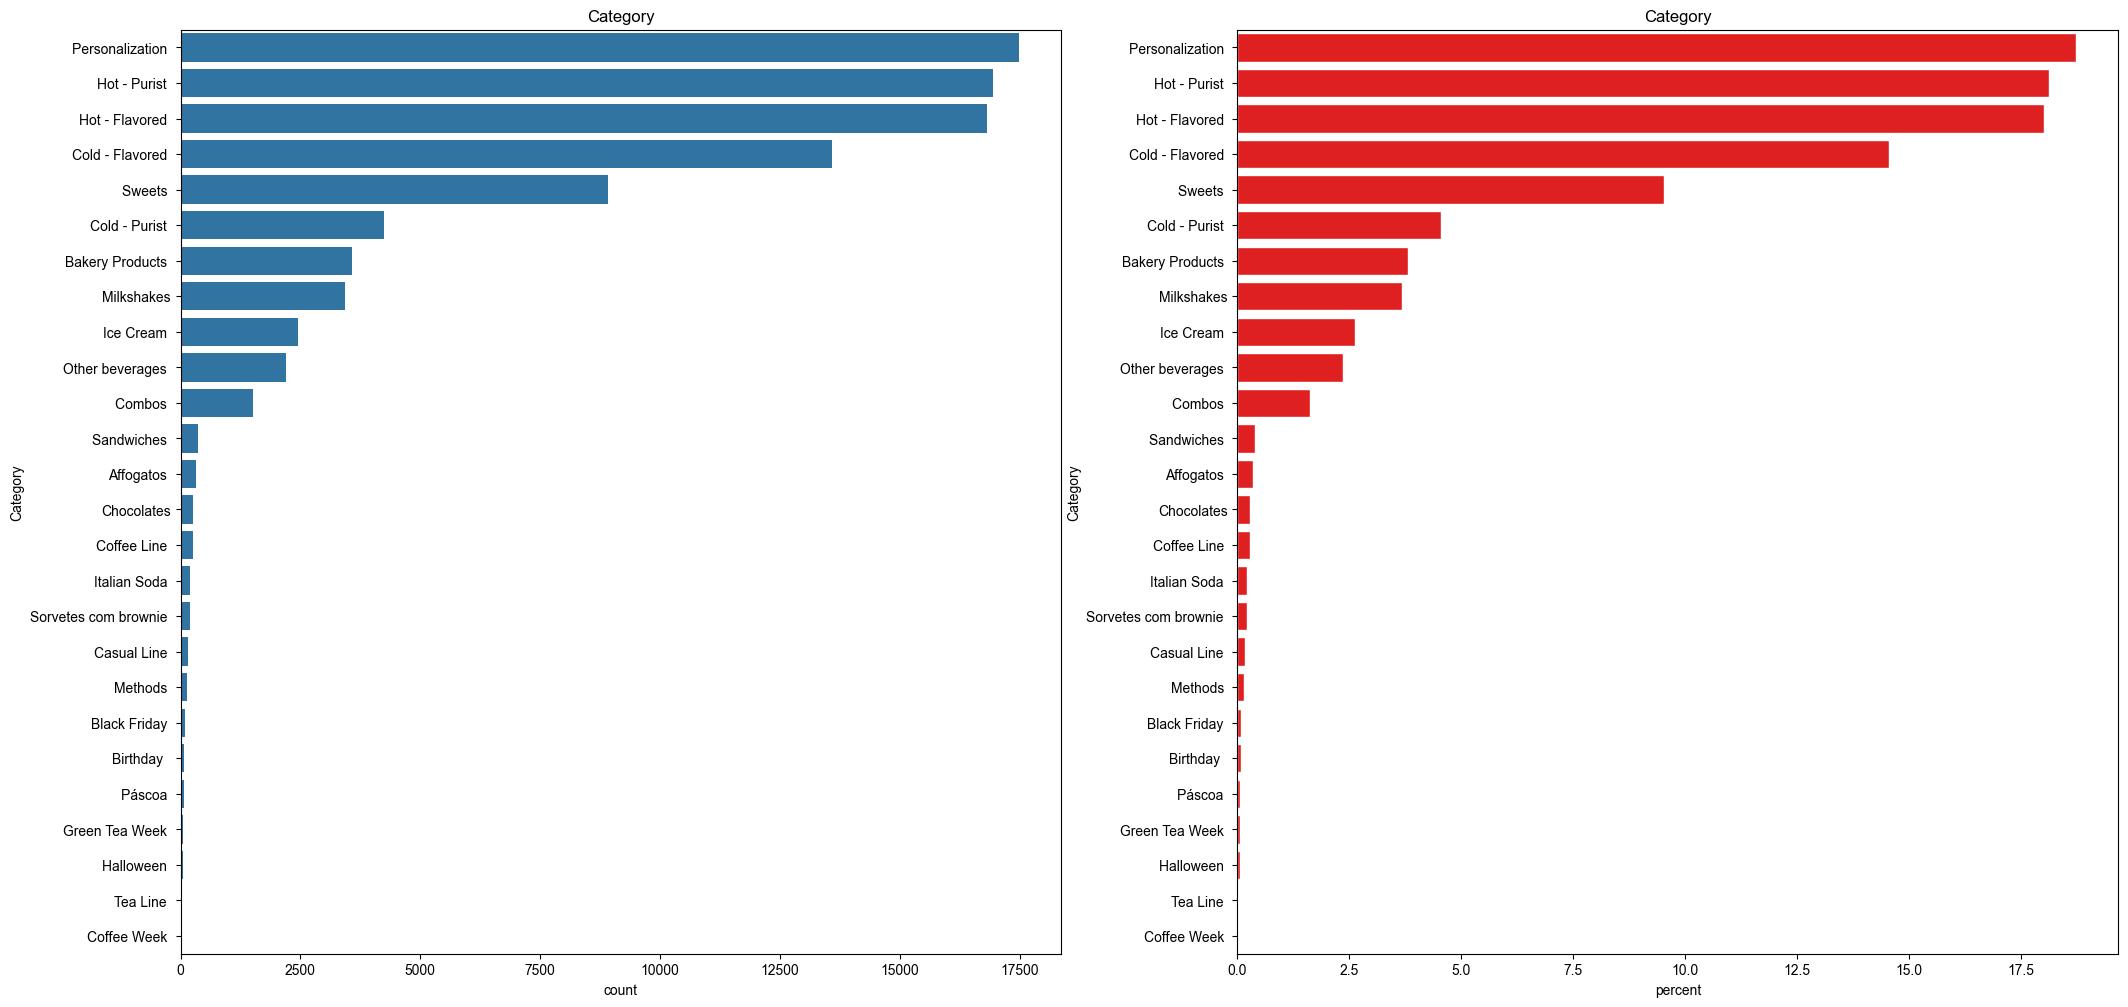

In [28]:
#analisando category, place or sale, payment type, payment method
y=df['Category']
plt.subplots(figsize=(25,12), nrows=1, ncols=2)
plt.subplot(1,2,1)
sns.countplot(data=y, order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)

plt.subplot(1,2,2)
sns.countplot(data=y, stat='percent', color='r', order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)


Text(0.5, 1.0, 'Payment Type')

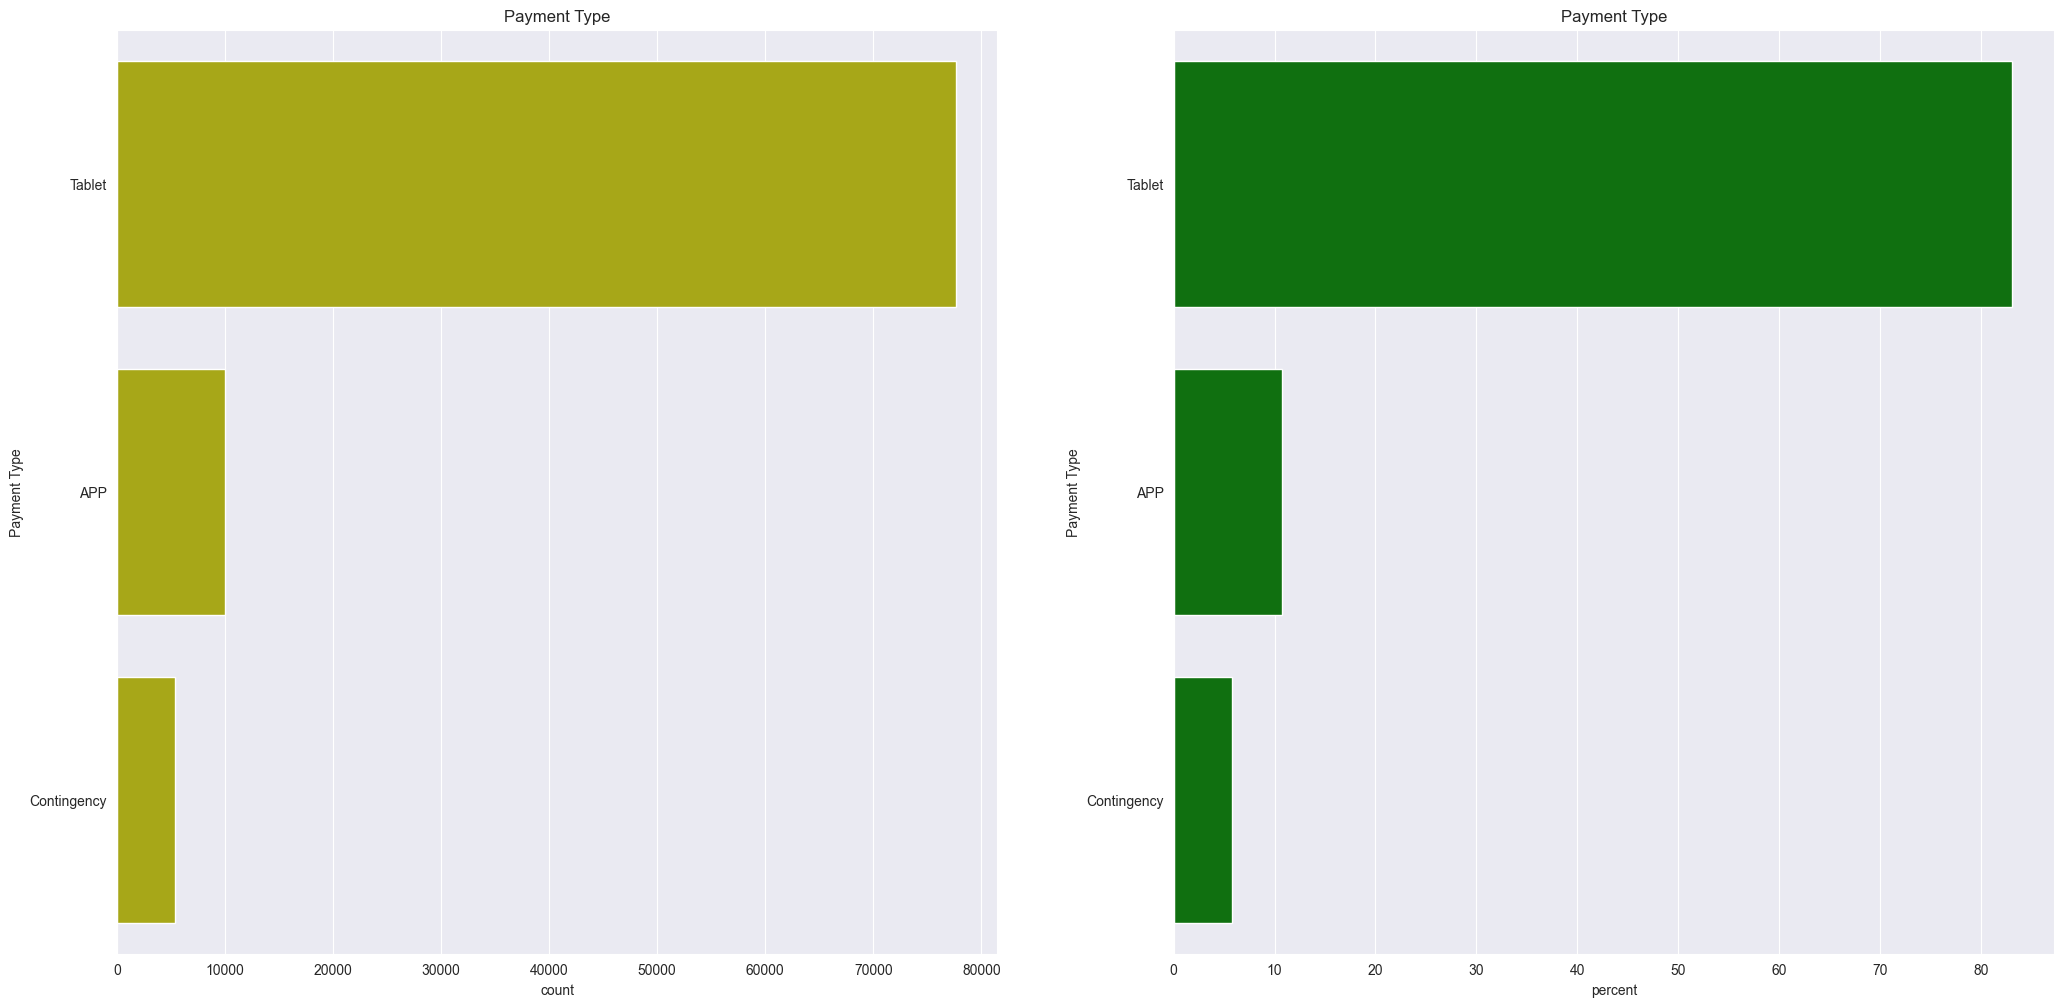

In [29]:
y=df['Payment Type']
plt.subplots(figsize=(25,12), nrows=1, ncols=2)
plt.subplot(1,2,1)
sns.countplot(data=y, order=y.value_counts().index, color='y')
sns.set_style("darkgrid")
plt.title(y.name)

plt.subplot(1,2,2)
sns.countplot(data=y, stat='percent', color='g', order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)


Text(0.5, 1.0, 'Payment Method')

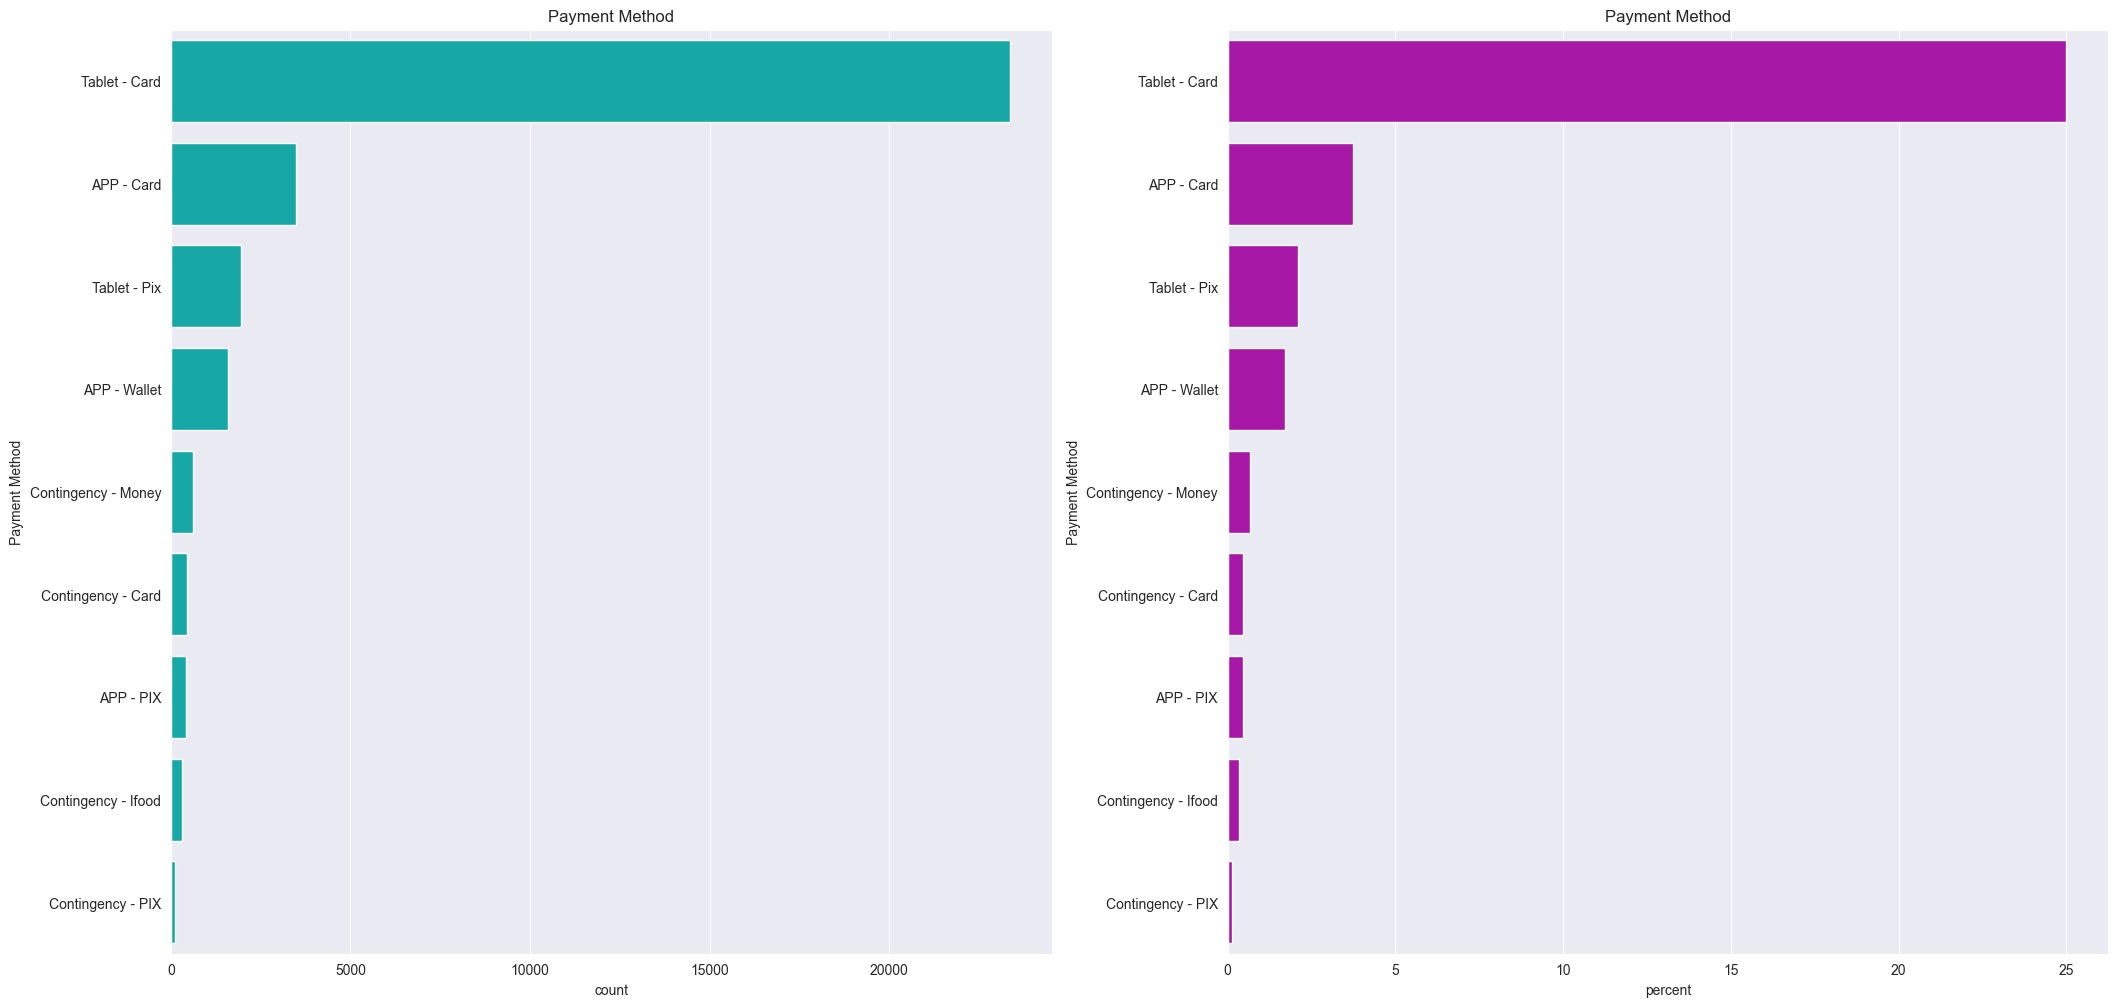

In [30]:
y=df['Payment Method']
plt.subplots(figsize=(25,12), nrows=1, ncols=2)
plt.subplot(1,2,1)
sns.countplot(data=y, order=y.value_counts().index, color='c')
sns.set_style("darkgrid")
plt.title(y.name)

plt.subplot(1,2,2)
sns.countplot(data=y, stat='percent', color='m', order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)

Text(0.5, 1.0, 'Place or Sale')

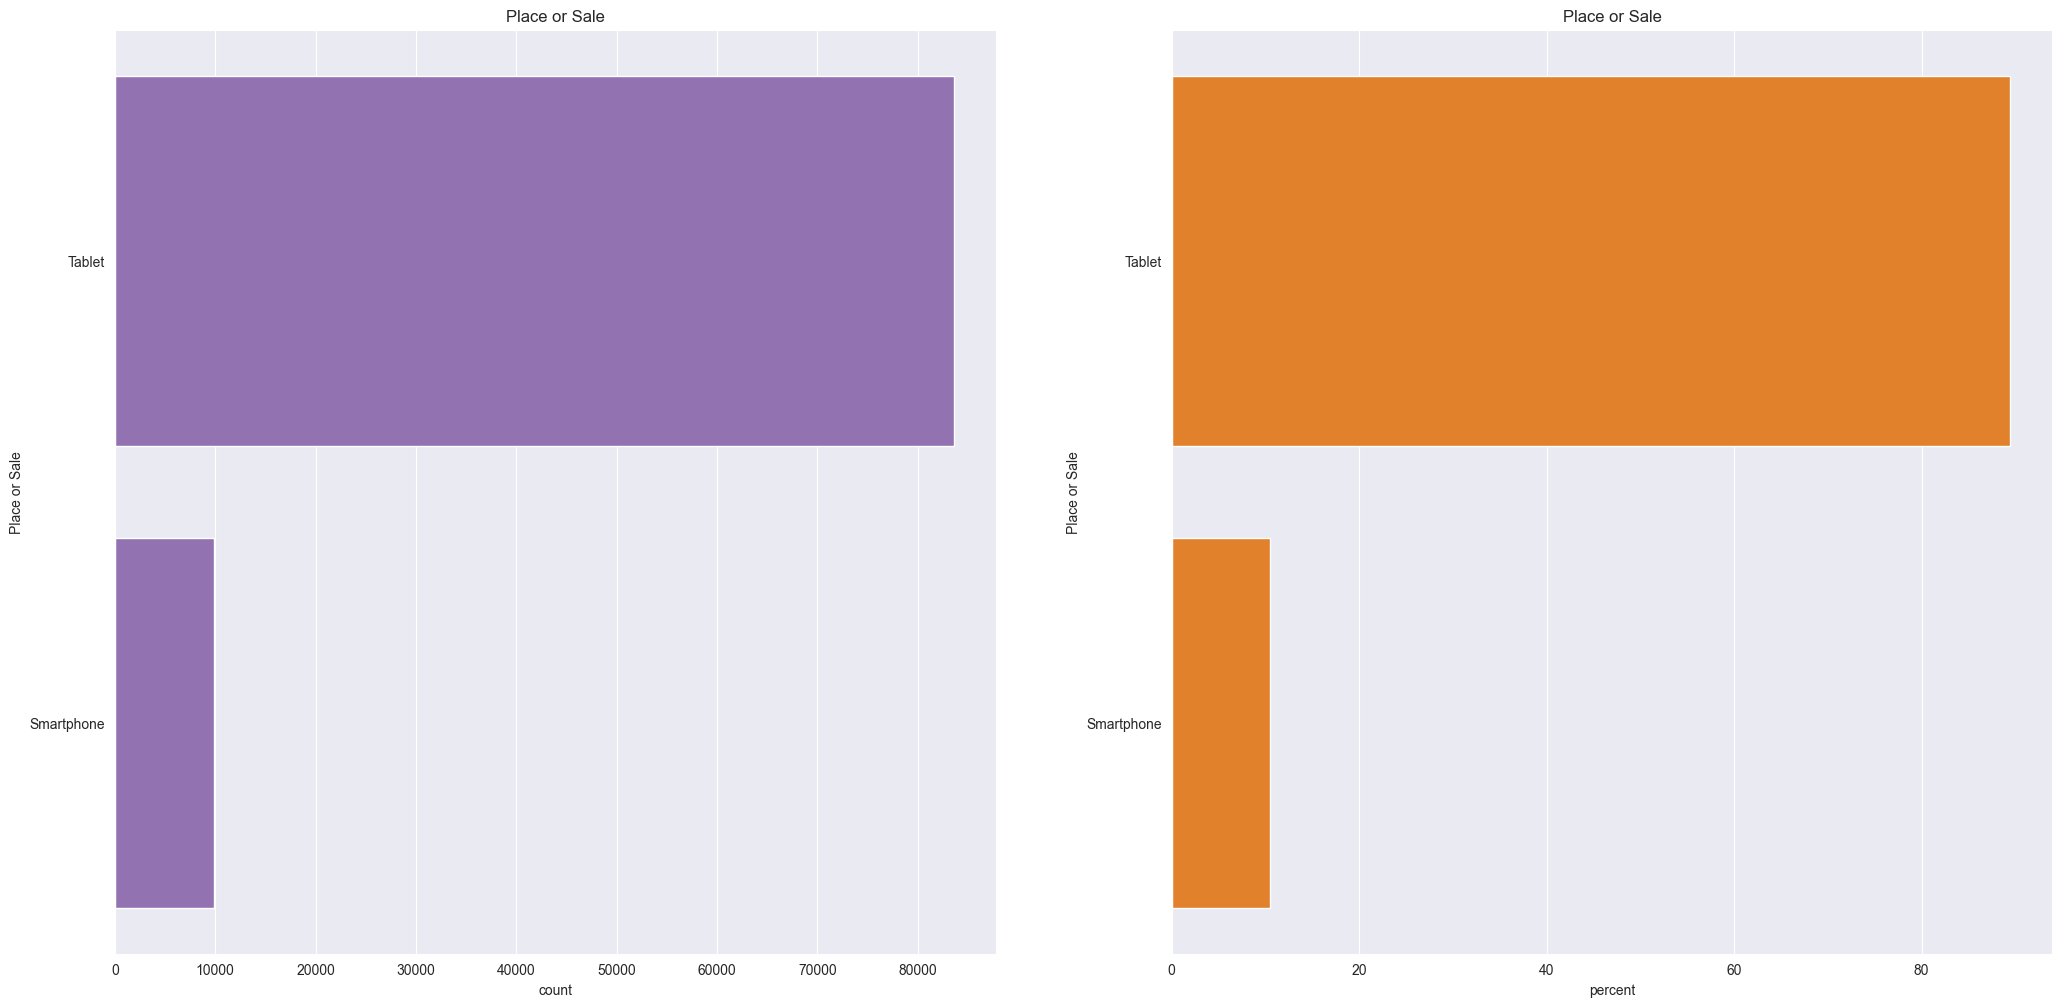

In [31]:
y=df['Place or Sale']
plt.subplots(figsize=(25,12), nrows=1, ncols=2)
plt.subplot(1,2,1)
sns.countplot(data=y, order=y.value_counts().index, color='tab:purple')
sns.set_style("darkgrid")
plt.title(y.name)

plt.subplot(1,2,2)
sns.countplot(data=y, stat='percent', color='tab:orange', order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)

### Analisando a coluna de produtos

In [32]:
df['Product'].value_counts()

Product
Double espresso                7448
Mocha latte                    5947
 Lactose free                  4673
Vanilla (iced)                 4401
Caramel latte                  3972
                               ... 
 No ginger                        0
 Orange Cake with Ice Cream       0
 Original (60ºC)                  0
 Original Chai                    0
 Without Milk (Chai/Matcha)       0
Name: count, Length: 229, dtype: int64

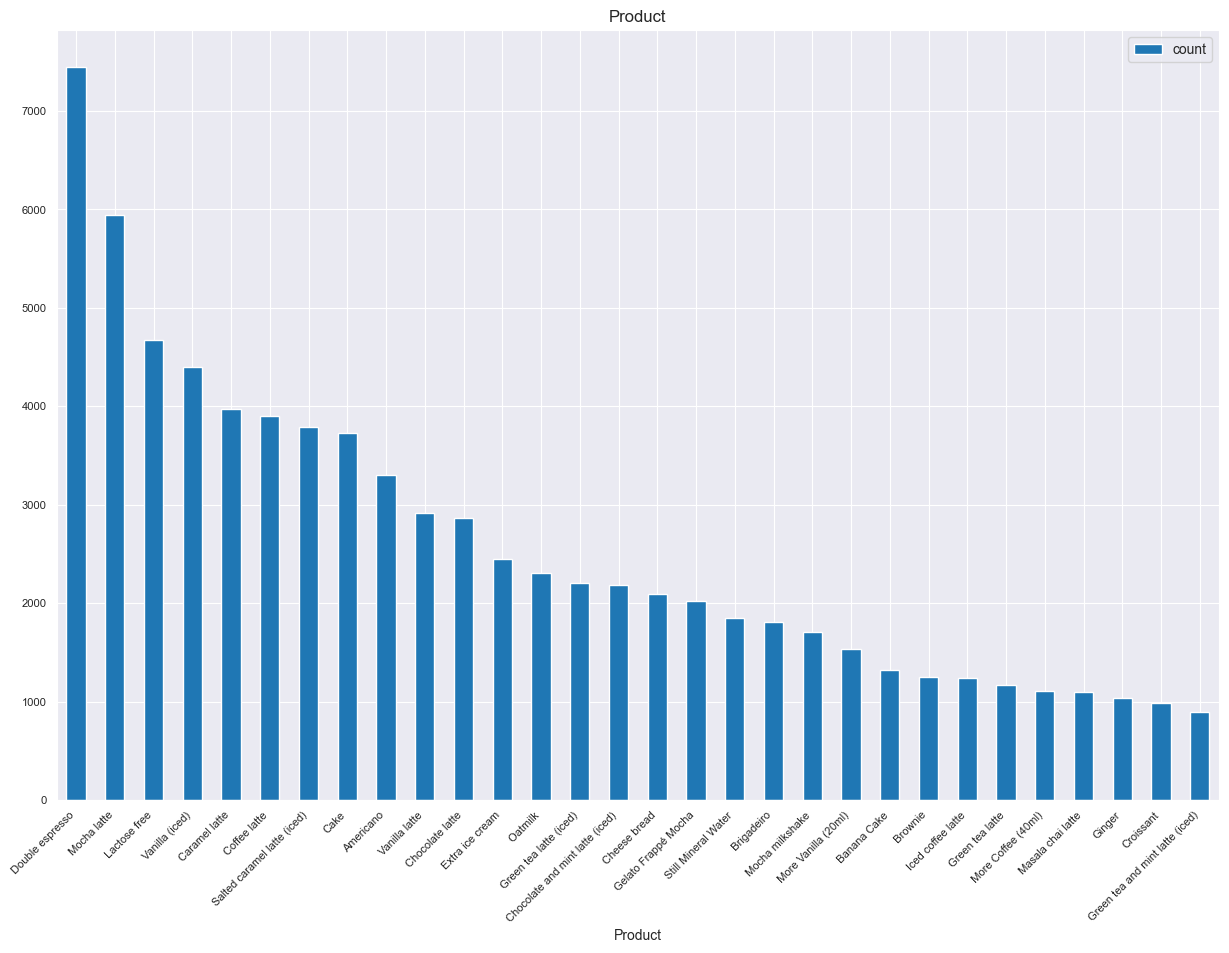

In [33]:
target=df['Product'].value_counts().nlargest(30)

target.plot(kind='bar', title ="Product", figsize=(15, 10), legend=True, fontsize=8);
plt.xticks(rotation=45, ha='right');



In [34]:
target.info()
total = sum(target)
total

<class 'pandas.core.series.Series'>
CategoricalIndex: 30 entries, Double espresso to Green tea and mint latte (iced)
Series name: count
Non-Null Count  Dtype
--------------  -----
30 non-null     int64
dtypes: int64(1)
memory usage: 10.2 KB


77234

In [35]:
productpercent=total/df['Product'].count()
productpercent

0.8269873222545828

In [36]:
target = target.reset_index()
target

,Product,count
0,Double espresso,7448
1,Mocha latte,5947
2,Lactose free,4673
3,Vanilla (iced),4401
4,Caramel latte,3972
5,Coffee latte,3900
6,Salted caramel latte (iced),3787
7,Cake,3726
8,Americano,3307
9,Vanilla latte,2916


In [37]:
target['Percentage'] = (target['count']/total)*productpercent

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10888\8983485.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['{:,.1%}'.format(x) for x in vals]);


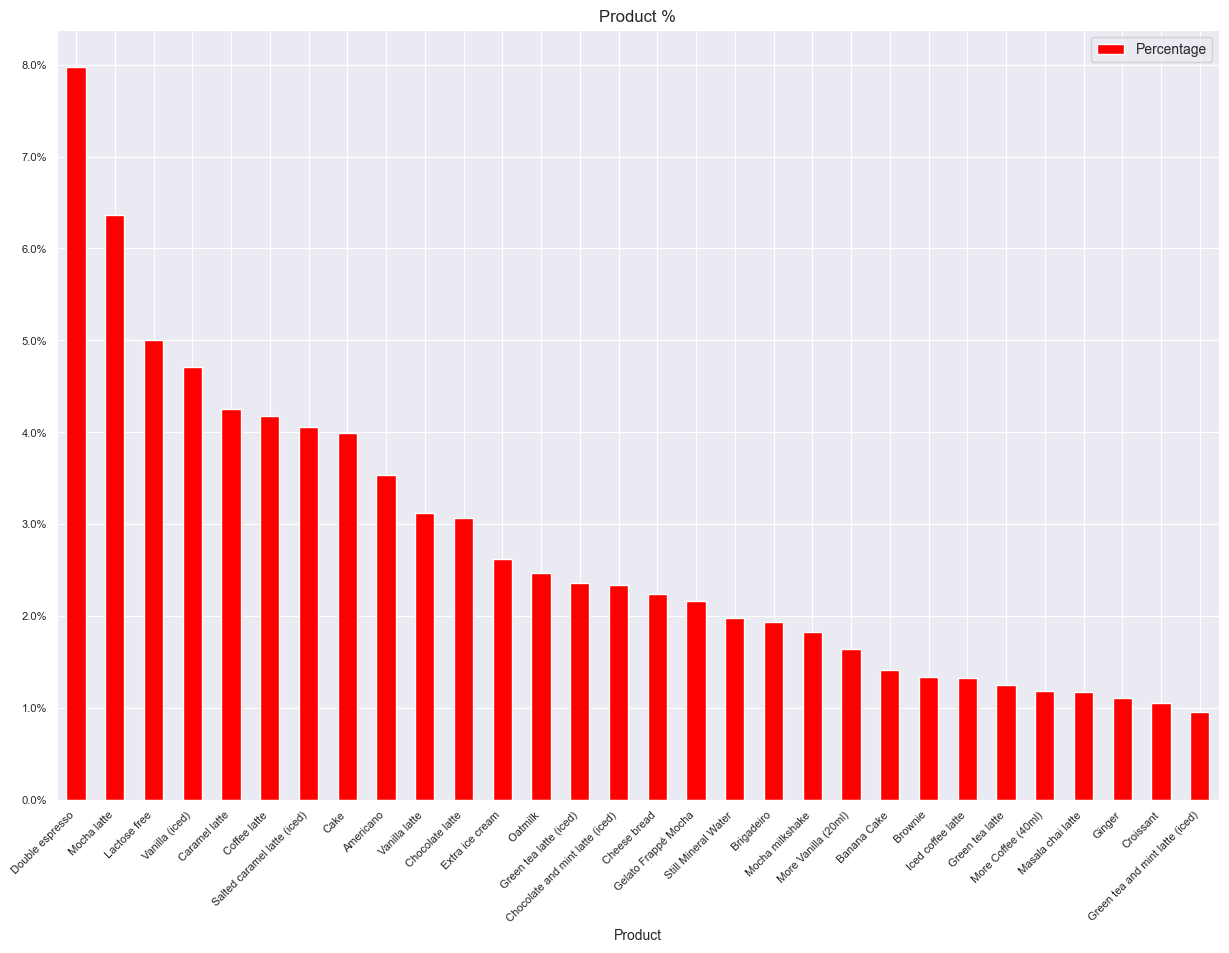

In [38]:
plot = target.plot(x='Product', y='Percentage', kind='bar', title ="Product %", figsize=(15, 10), legend=True, fontsize=8, color='r');
plt.xticks(rotation=45, ha='right');
vals = plot.get_yticks();
plot.set_yticklabels(['{:,.1%}'.format(x) for x in vals]);


### Variáveis numéricas (contínuas e discretas)

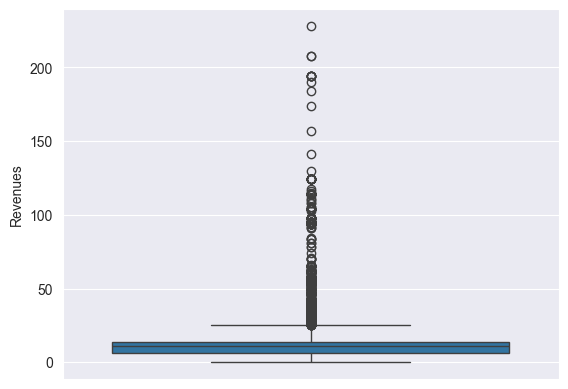

In [39]:
sns.boxplot(data=df['Revenues'])
sns.set_style("darkgrid")

In [40]:
from matplotlib.cbook import boxplot_stats

Returns:
list of dict
A list of dictionaries containing the results for each column of data. Keys of each dictionary are the following:

| Key        | Value Description|
| ---------- |:----------------:| 
| label |tick label for the boxplot|
|mean|arithmetic mean value|
|med|50th percentile|
|q1|first quartile (25th percentile)|
|q3|third quartile (75th percentile)|
|iqr|interquartile range|
|cilo|lower notch around the median|
|cihi|upper notch around the median|
|whislo|end of the lower whisker|
|whishi|end of the upper whisker|
|fliers|outliers|

In [41]:
revenues_stats = boxplot_stats(df['Revenues'])
revenues_stats = pd.DataFrame(revenues_stats)
revenues_stats = revenues_stats.drop('fliers', axis = 1)
revenues_stats

,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
0,10.771387,7.5,10.661469,10.73853,25.200001,0.01,6.5,10.7,14.0


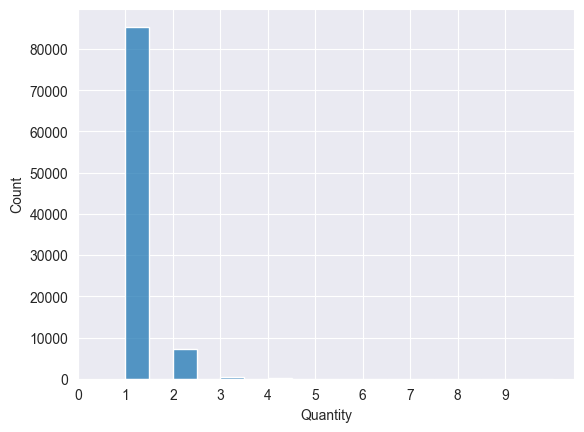

In [42]:
y = df['Quantity']
ax = sns.histplot(y)
sns.set_style("darkgrid")
ax.set_xticks((0,1,2,3,4,5,6,7,8,9));
plt.show()

In [43]:
Quantity_stats = boxplot_stats(df['Quantity'])
Quantity_stats = pd.DataFrame(Quantity_stats)
Quantity_stats = Quantity_stats.drop('fliers', axis = 1)
Quantity_stats

,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
0,1.095329,0.0,1.0,1.0,1,1,1.0,1.0,1.0


# Artigo 04 - Inserindo as classes  & Análise bi-variada parte I

## Inserindo as classes

In [44]:
productcount = pd.Series(df['Product ID'].unique()).count()
categorycount = pd.Series(df['Category'].unique()).count()
productcount, categorycount

(157, 26)

In [45]:
#passo 1
categorias = pd.DataFrame(df['Category'].unique())
categorias

,0
0,Hot - Flavored
1,Methods
2,Hot - Purist
3,Cold - Purist
4,Personalization
5,Cold - Flavored
6,Sweets
7,Milkshakes
8,Affogatos
9,Sandwiches


In [46]:
#passo 2
categorias.to_csv('categorias_sem_classe.csv', sep=';', encoding='utf_8')

In [47]:
#passo 3
categorias = pd.read_csv('categorias_com_classe.csv', encoding='utf_8', sep=';')
categorias

,Category,Class,Class Description
0,Hot - Flavored,B,Coffee drinks & milkshakes
1,Methods,K,Promoted sales
2,Hot - Purist,B,Coffee drinks & milkshakes
3,Cold - Purist,B,Coffee drinks & milkshakes
4,Personalization,P,Personalization
5,Cold - Flavored,B,Coffee drinks & milkshakes
6,Sweets,F,Foods
7,Milkshakes,B,Coffee drinks & milkshakes
8,Affogatos,D,Desserts
9,Sandwiches,F,Foods


In [48]:
#passo 4
df = df.merge(categorias, on='Category')
df

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity,year,month_of_year,week_of_year,weekday,day,day_of_year,hour,Class,Class Description
0,2023-12-31 17:16:23,138,Hot - Flavored,10924941,Tablet,Tablet,Caramel latte,1FC,Tablet - Card,14.500000,1,2023,12,52,6,2023-12-31,365,17,B,Coffee drinks & milkshakes
1,2023-12-31 16:39:10,138,Hot - Flavored,10924770,Tablet,Tablet,Mocha latte,3MC,Tablet - Pix,13.100000,1,2023,12,52,6,2023-12-31,365,16,B,Coffee drinks & milkshakes
2,2023-12-31 16:28:41,138,Hot - Flavored,10924720,APP,Smartphone,Caramel latte,1FC,APP - Card,13.050000,1,2023,12,52,6,2023-12-31,365,16,B,Coffee drinks & milkshakes
3,2023-12-31 16:13:52,138,Hot - Flavored,10924631,Tablet,Tablet,Chocolate latte,4UC,Tablet - Card,12.300000,1,2023,12,52,6,2023-12-31,365,16,B,Coffee drinks & milkshakes
4,2023-12-31 16:12:58,138,Hot - Flavored,10924623,Tablet,Tablet,Caramel latte,1FC,Tablet - Card,14.500000,1,2023,12,52,6,2023-12-31,365,16,B,Coffee drinks & milkshakes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93387,2023-03-01 17:58:02,138,Birthday,6984913,Tablet,Tablet,Vanilla latte (discount discount sale),BIRTH,NaN,17.299999,1,2023,3,9,2,2023-03-01,60,17,K,Promoted sales
93388,2023-03-01 17:37:02,138,Birthday,6984529,APP,Smartphone,Vanilla latte (discount discount sale),BIRTH,APP - Card,17.299999,1,2023,3,9,2,2023-03-01,60,17,K,Promoted sales
93389,2023-03-01 16:50:16,138,Birthday,6983646,Tablet,Tablet,Vanilla latte (discount discount sale),BIRTH,NaN,17.299999,1,2023,3,9,2,2023-03-01,60,16,K,Promoted sales
93390,2023-03-01 15:02:06,138,Birthday,6981451,Tablet,Tablet,Vanilla latte (discount discount sale),BIRTH,NaN,17.299999,1,2023,3,9,2,2023-03-01,60,15,K,Promoted sales


In [49]:
df['Class'] = df['Class'].astype('category')
df['Class Description'] = df['Class Description'].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93392 entries, 0 to 93391
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               93392 non-null  datetime64[ns]
 1   Store ID           93392 non-null  category      
 2   Category           93392 non-null  object        
 3   Sale ID            93392 non-null  category      
 4   Payment Type       93042 non-null  category      
 5   Place or Sale      93392 non-null  category      
 6   Product            93392 non-null  category      
 7   Product ID         93392 non-null  category      
 8   Payment Method     32321 non-null  category      
 9   Revenues           93392 non-null  float32       
 10  Quantity           93392 non-null  int8          
 11  year               93392 non-null  category      
 12  month_of_year      93392 non-null  category      
 13  week_of_year       93392 non-null  category      
 14  weekda

## Análise univariada - classes

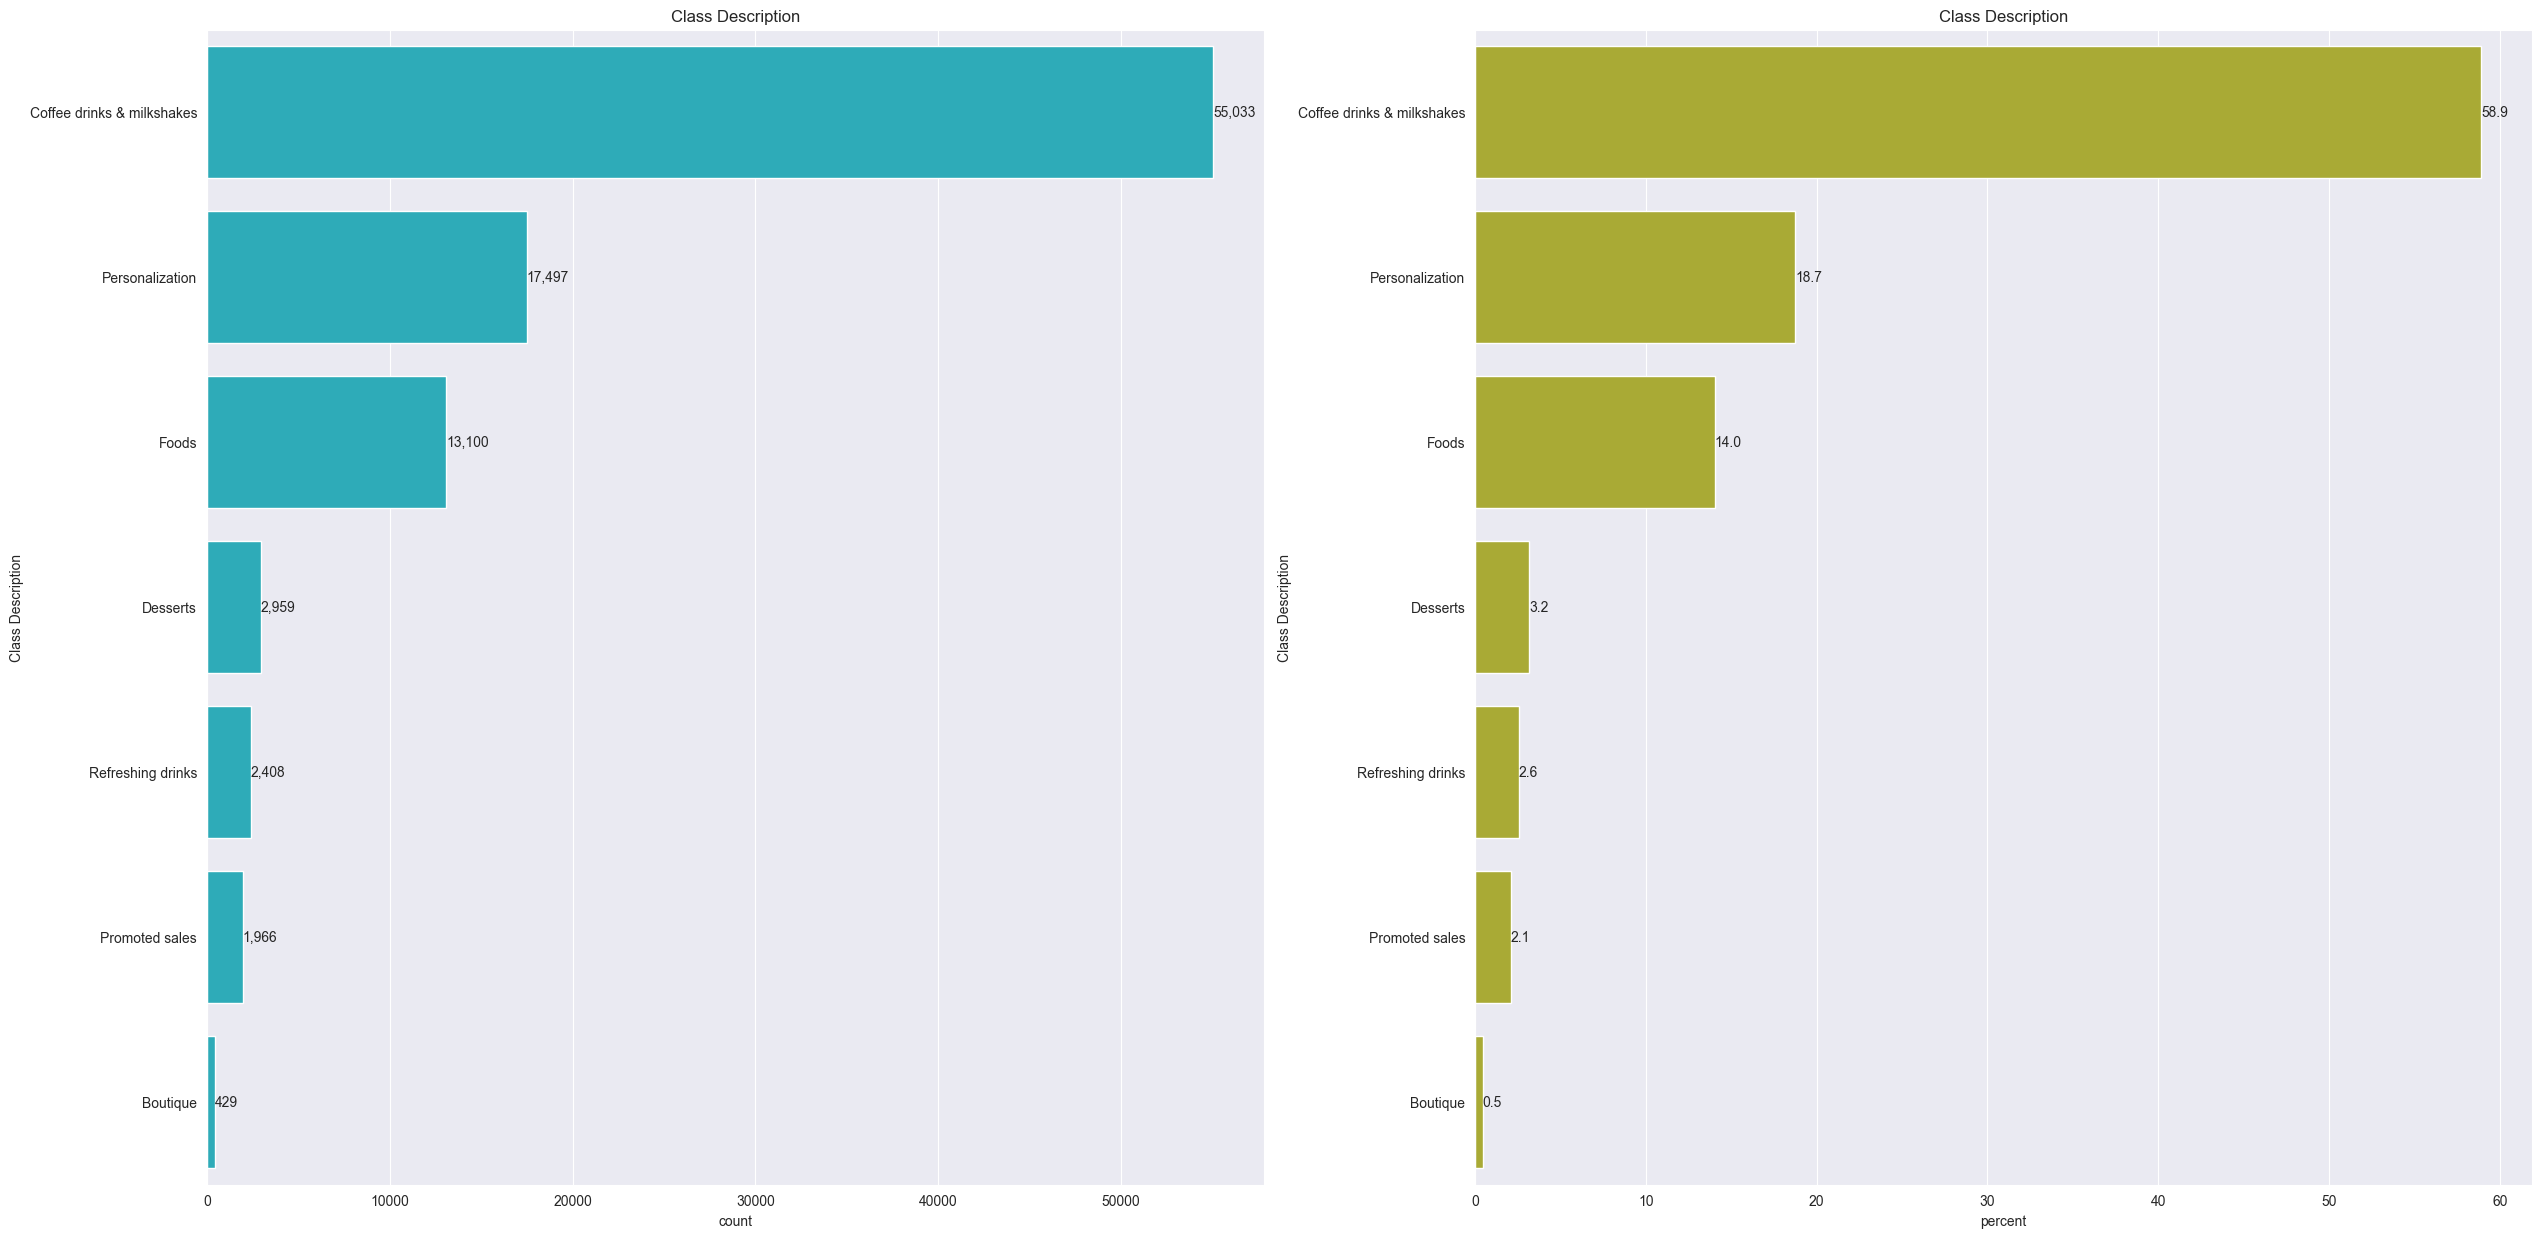

In [50]:
y=df['Class Description']
plt.subplots(figsize=(30,15), nrows=1, ncols=2)
plt.subplot(1,2,1)
ax = sns.countplot(data=y, order=y.value_counts().index, color='tab:cyan')
sns.set_style("darkgrid")
plt.title(y.name)
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}')

plt.subplot(1,2,2)
ax = sns.countplot(data=y, stat='percent', color='tab:olive', order=y.value_counts().index)
sns.set_style("darkgrid")
plt.title(y.name)
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.1f}')


## Análise bi-variada simplificada (parte I)

### Cruzamentos que fazem sentido (sem os agregadores de tempo)

|        Cross       	| **Sale ID** 	| **Class** 	| **Category** 	| **Product** 	| **Place or Sale** 	| **Payment Type** 	| **Payment Method** 	| **Revenues** 	| **Quantity** 	|
|:------------------:	|:-----------:	|:---------:	|:------------:	|:-----------:	|:-----------------:	|:----------------:	|:------------------:	|:------------:	|:------------:	|
|     **Sale ID**    	|      -      	|     -     	|       -      	|      -      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|      **Class**     	|      -      	|     -     	|       X      	|      X      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|    **Category**    	|      -      	|     X     	|       -      	|      X      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|     **Product**    	|      X      	|     X     	|       X      	|      -      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|  **Place or Sale** 	|      -      	|     -     	|       -      	|      -      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|  **Payment Type**  	|      -      	|     -     	|       -      	|      -      	|         -         	|         -        	|          -         	|       X      	|       X      	|
| **Payment Method** 	|      -      	|     -     	|       -      	|      -      	|         -         	|         -        	|          -         	|       X      	|       X      	|
|    **Revenues**    	|      X      	|     X     	|       X      	|      X      	|         X         	|         X        	|          X         	|       -      	|       -      	|
|    **Quantity**    	|      X      	|     X     	|       X      	|      X      	|         X         	|         X        	|          X        	|       -      	|       -      	|

### Finalmente, falando do ticket


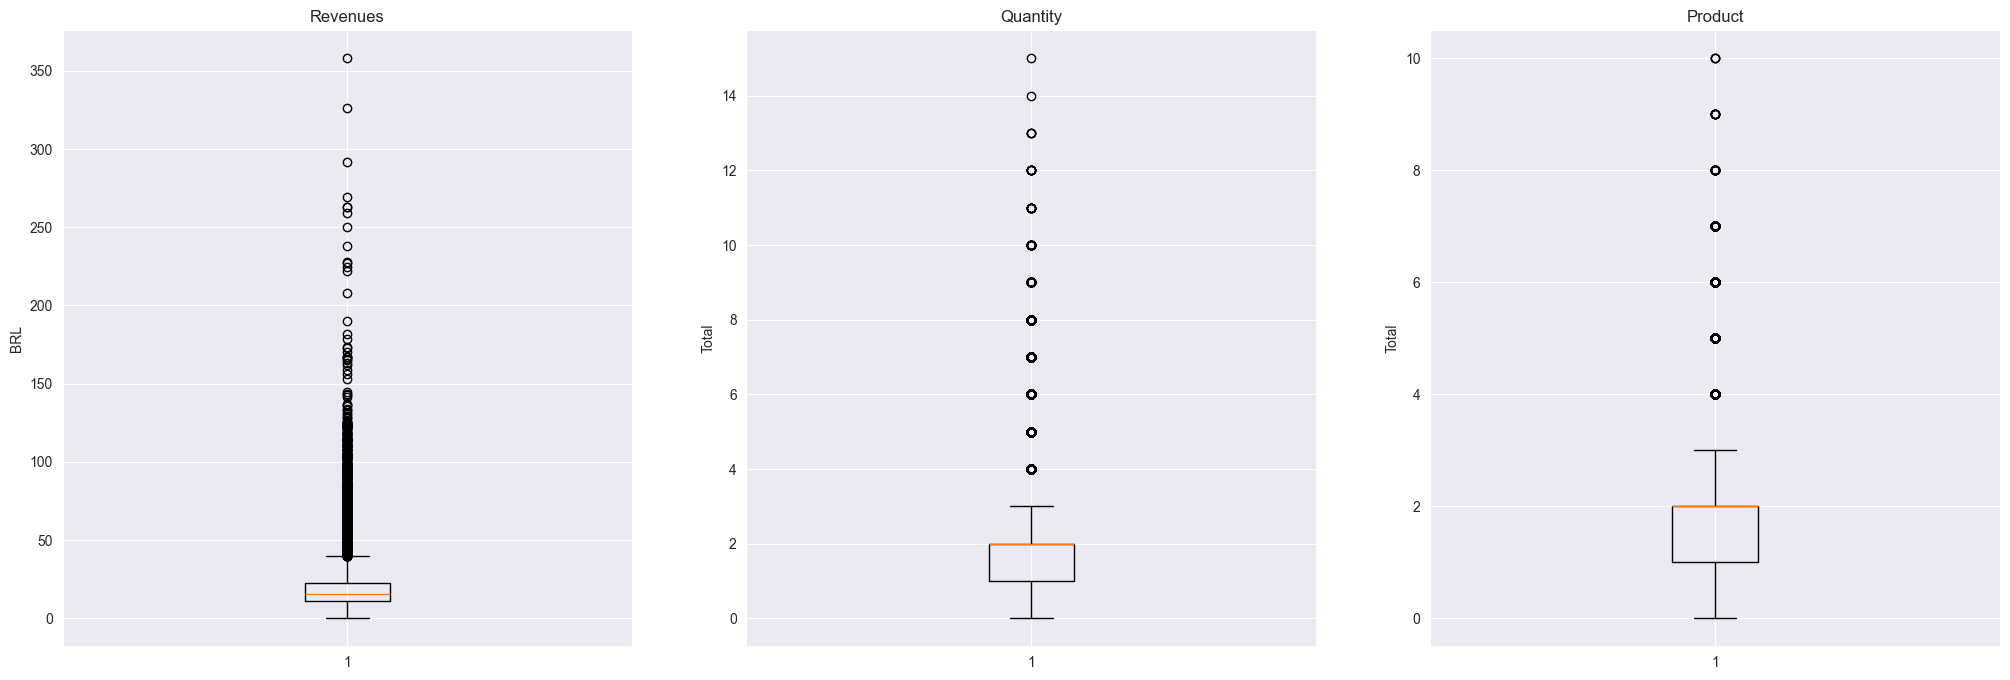

In [51]:

# Create a figure and a set of subplots
fig2, axes = plt.subplots(figsize=(25,8), nrows=1, ncols=3)
plt.subplot(1,3,1)
plt.boxplot(tickets['Revenues']);
plt.ylabel('BRL')
plt.title('Revenues')

plt.subplot(1,3,2)
plt.boxplot(tickets['Quantity']);
plt.ylabel('Total')
plt.title('Quantity')

plt.subplot(1,3,3)
plt.boxplot(tickets['Product']);
plt.ylabel('Total')
plt.title('Product')

plt.show()

In [52]:
#pulling boxplot stats
tkt_rev, tkt_qtty, tkt_prod = boxplot_stats(tickets['Revenues']), boxplot_stats(tickets['Quantity']), boxplot_stats(tickets['Product'])

#launching into dataframe
tkt_rev, tkt_qtty, tkt_prod = pd.DataFrame(tkt_rev), pd.DataFrame(tkt_qtty), pd.DataFrame(tkt_prod)

#droppping outliers
tkt_rev, tkt_qtty, tkt_prod = tkt_rev.drop('fliers', axis = 1), tkt_qtty.drop('fliers', axis = 1), tkt_prod.drop('fliers', axis = 1)

#adding series name
tkt_rev['name'] = tickets['Revenues'].name
tkt_qtty['name'] = tickets['Quantity'].name
tkt_prod['name']=tickets['Product'].name

#combining dataframes and reordering columns
tktstats = pd.concat([tkt_qtty, tkt_prod, tkt_rev])
tktstats.columns
tktstats = tktstats.reindex(columns=['name', 'mean', 'iqr', 'cilo', 'cihi', 'whishi', 'whislo', 'q1', 'med', 'q3'])
tktstats


,name,mean,iqr,cilo,cihi,whishi,whislo,q1,med,q3
0,Quantity,1.968537,1.00,1.993113,2.006887,3.00,0.0,1.00,2.0,2.0
0,Product,1.796729,1.00,1.993113,2.006887,3.00,0.0,1.00,2.0,2.0
0,Revenues,19.358441,11.51,15.420728,15.579272,39.95,0.0,11.19,15.5,22.7


### Bloco de produto versus Revenue e Quantity

#### Classe

In [53]:
classdist = df.groupby('Class Description').aggregate({'Quantity':'sum', 'Revenues':'sum'})
classdist = classdist.sort_values(by='Revenues', ascending=False)
classdist

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10888\3817415981.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  classdist = df.groupby('Class Description').aggregate({'Quantity':'sum', 'Revenues':'sum'})


,Quantity,Revenues
Class Description,,
Coffee drinks & milkshakes,59814,714341.500000
Foods,15380,109245.148438
Desserts,3289,64337.000000
Personalization,18695,38650.609375
Promoted sales,2090,29292.050781
Boutique,457,27519.550781
Refreshing drinks,2570,22575.531250


In [54]:
totalrev = classdist['Revenues'].sum()
totalqtty = classdist['Quantity'].sum()
totalrev, totalqtty

(1005961.4, 102295)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10888\3342780097.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


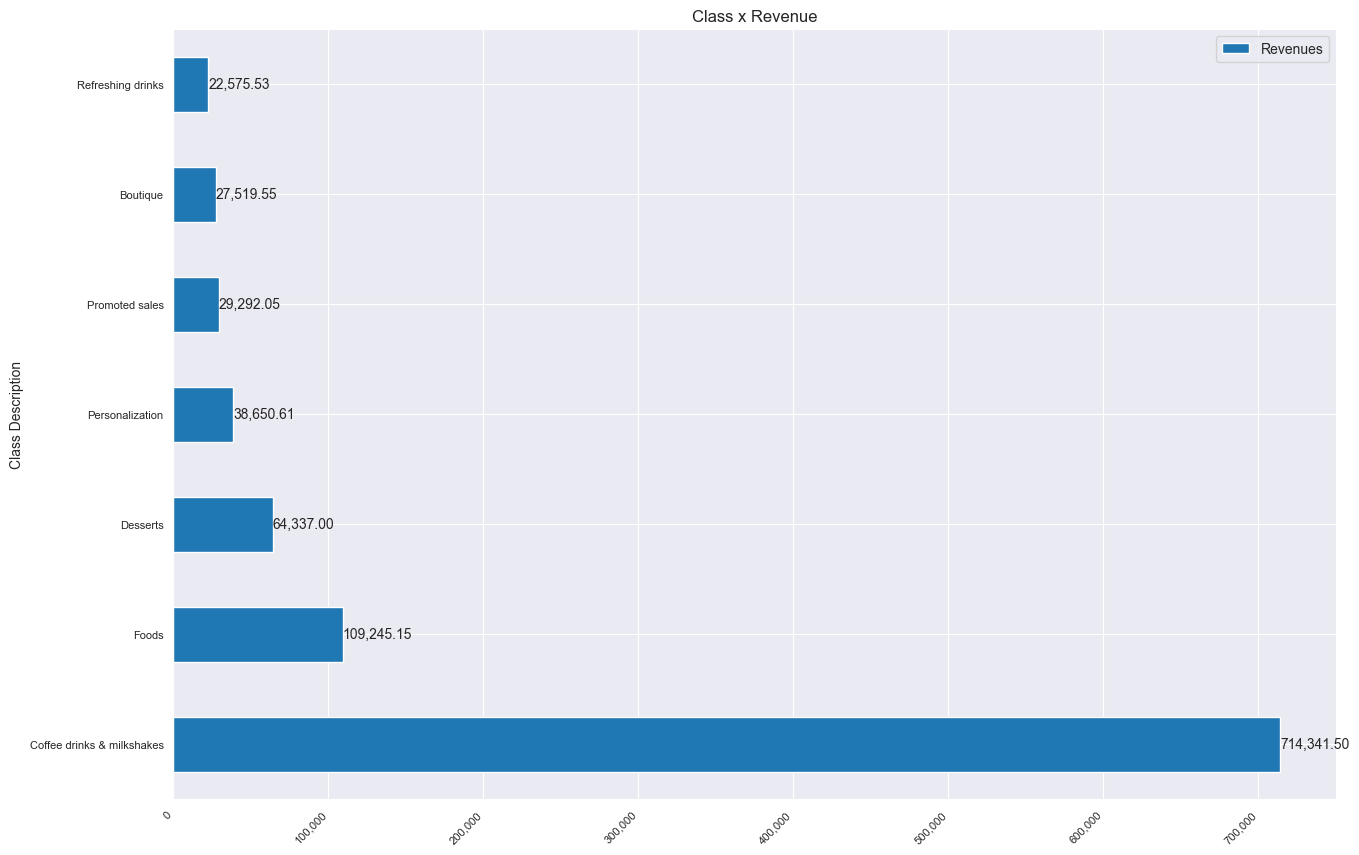

In [55]:
plot = classdist.plot(y=['Revenues'], kind='barh', title ="Class x Revenue", figsize=(15, 10), legend=True, fontsize=8);

#rotating x axis labels
plt.xticks(rotation=45, ha='right');

#formating x axis units
vals = plot.get_xticks();
plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.2f}');


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10888\1955443381.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


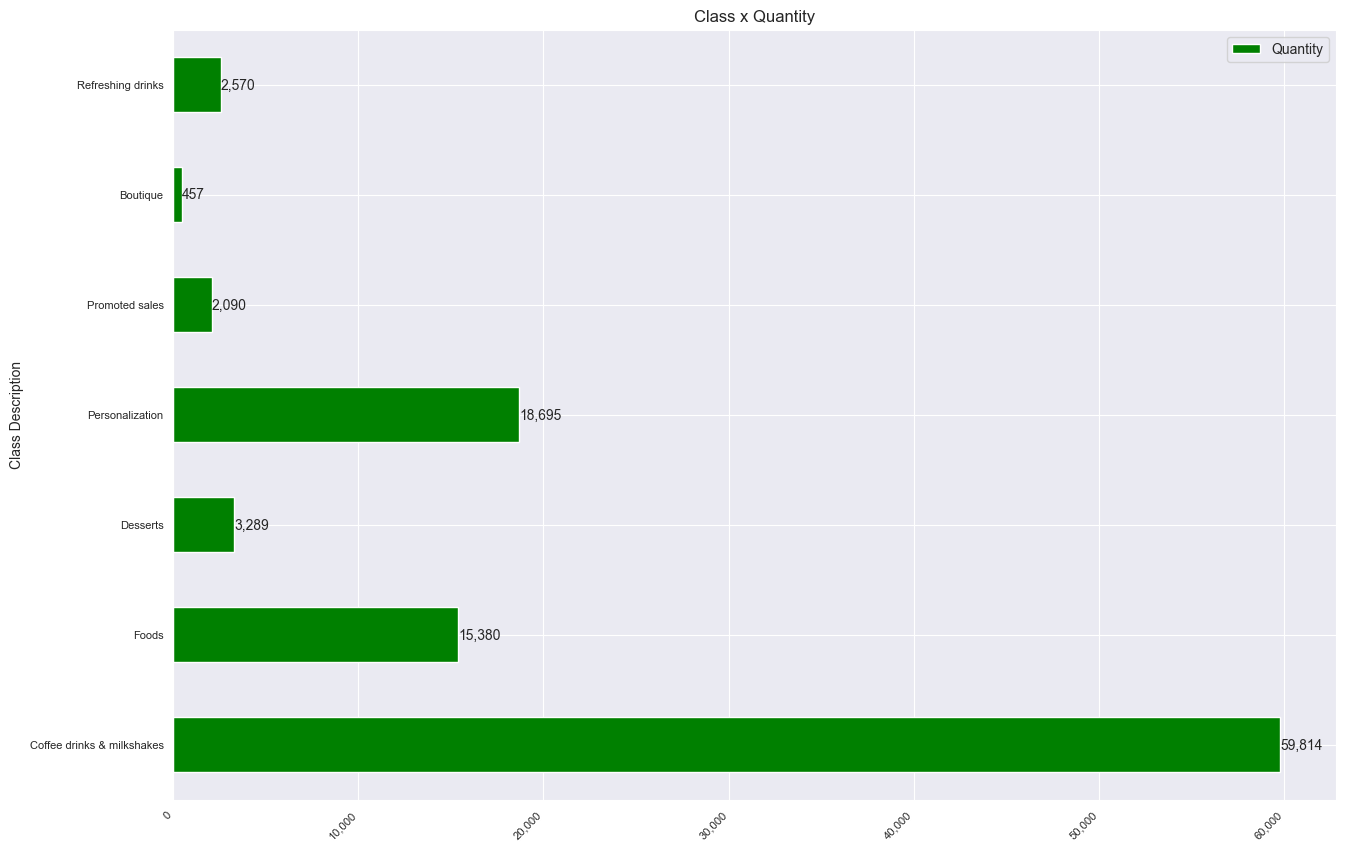

In [56]:
plot = classdist.plot(y=['Quantity'], kind='barh', title ="Class x Quantity", figsize=(15, 10), legend=True, fontsize=8, color='g');

#rotating x axis labels
plt.xticks(rotation=45, ha='right');

#formating x axis units
vals = plot.get_xticks();
plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.0f}');

In [57]:
classdist['Avg value'] = classdist['Revenues']/classdist['Quantity']
classdist

,Quantity,Revenues,Avg value
Class Description,,,
Coffee drinks & milkshakes,59814,714341.500000,11.942714
Foods,15380,109245.148438,7.103066
Desserts,3289,64337.000000,19.561265
Personalization,18695,38650.609375,2.067430
Promoted sales,2090,29292.050781,14.015335
Boutique,457,27519.550781,60.217835
Refreshing drinks,2570,22575.531250,8.784253


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_10888\129742968.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


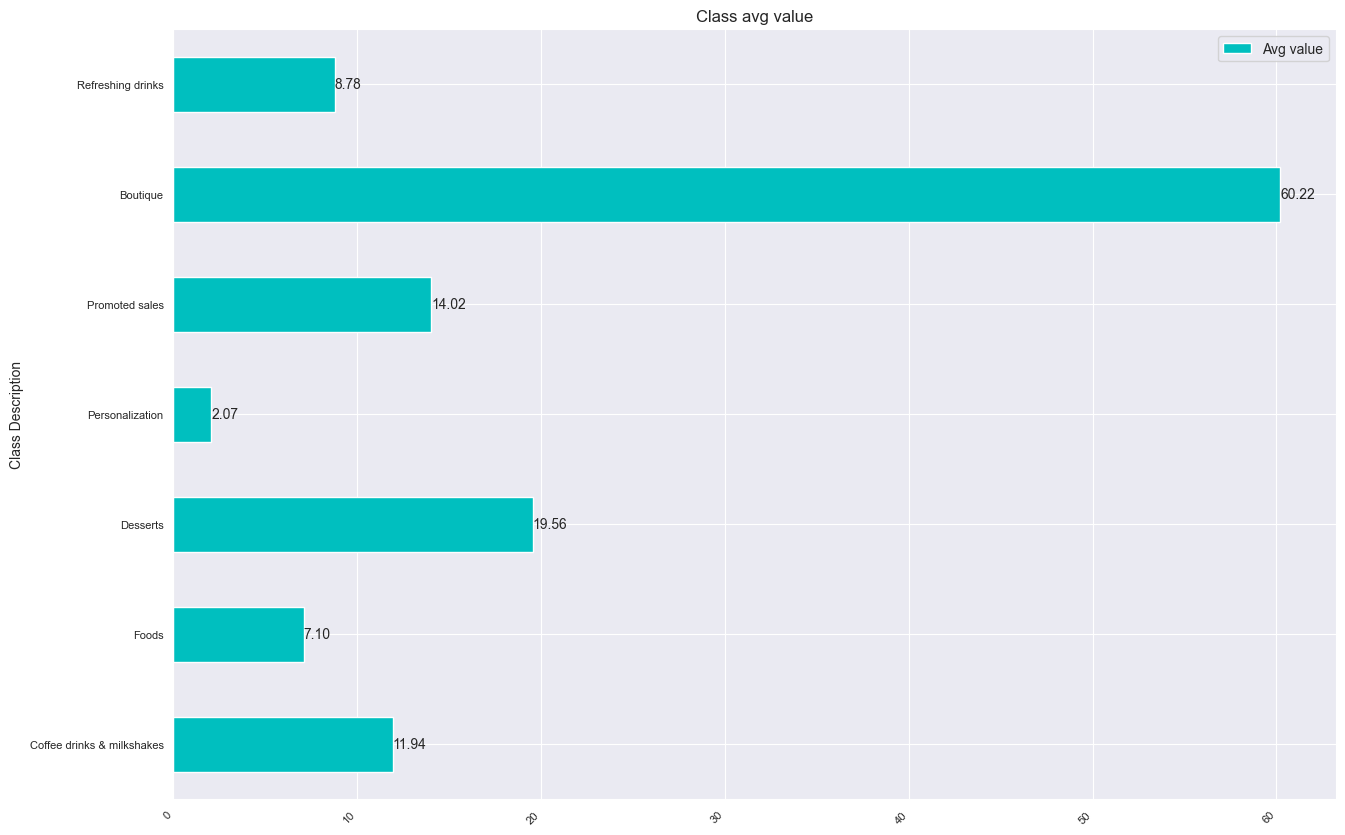

In [58]:
plot = classdist.plot(y=['Avg value'], kind='barh', title ="Class avg value", figsize=(15, 10), legend=True, fontsize=8, color='c');

#rotating x axis labels
plt.xticks(rotation=45, ha='right');

#formating x axis units
vals = plot.get_xticks();
plot.set_xticklabels(['{:,.0f}'.format(x) for x in vals]);


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.2f}');

# Artigo 05 - Análise bi-variada parte II

## Colunas de modo de pagamento versus Revenue e Quantity

In [59]:
maskNaNPmtType = df['Payment Type'].isna()
NaNPmtType = df[maskNaNPmtType]
NaNPmtType = NaNPmtType.sort_values(by='Date')
NaNPmtType.tail(10)
# NaNPmtType.info(memory_usage='deep')

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity,year,month_of_year,week_of_year,weekday,day,day_of_year,hour,Class,Class Description
14331,2022-04-09 20:20:30,138,Hot - Flavored,3146478,NaN,Tablet,Chocolate latte,4UC,NaN,8.7,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
66706,2022-04-09 20:20:30,138,Cold - Flavored,3146478,NaN,Tablet,Chocolate and mint latte (iced),5CM,NaN,10.8,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
66705,2022-04-09 20:20:30,138,Cold - Flavored,3146478,NaN,Tablet,Ginger,3BG,NaN,13.4,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
66707,2022-04-09 20:20:30,138,Cold - Flavored,3146478,NaN,Tablet,Vanilla (iced),1IC,NaN,12.4,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
66704,2022-04-09 20:30:25,138,Cold - Flavored,3146513,NaN,Tablet,Ginger,3BG,NaN,13.4,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
14329,2022-04-09 20:30:25,138,Hot - Flavored,3146513,NaN,Tablet,Mocha latte,3MC,NaN,10.1,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
66703,2022-04-09 20:33:24,138,Cold - Flavored,3146521,NaN,Tablet,Salted caramel latte (iced),2SC,NaN,14.1,1,2022,4,14,5,2022-04-09,99,20,B,Coffee drinks & milkshakes
31585,2022-04-29 10:41:09,138,Hot - Purist,3354674,NaN,Tablet,Double espresso,1PB,NaN,5.2,1,2022,4,17,4,2022-04-29,119,10,B,Coffee drinks & milkshakes
31586,2022-04-29 10:41:09,138,Hot - Purist,3354674,NaN,Tablet,Coffee latte,4TW,NaN,8.9,1,2022,4,17,4,2022-04-29,119,10,B,Coffee drinks & milkshakes
90148,2022-05-02 17:09:13,138,Casual Line,3394022,NaN,Smartphone,Bags,1TB,NaN,55.0,1,2022,5,18,0,2022-05-02,122,17,S,Boutique


In [60]:
maskNaNPmtMethod = df['Payment Method'].isna()
NaNPmtMethod = df[maskNaNPmtMethod]
NaNPmtMethod = NaNPmtMethod.sort_values(by='Date')
NaNPmtMethod.head(10)

,Date,Store ID,Category,Sale ID,Payment Type,Place or Sale,Product,Product ID,Payment Method,Revenues,Quantity,year,month_of_year,week_of_year,weekday,day,day_of_year,hour,Class,Class Description
55636,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Lactose free,1PE,NaN,1.45,1,2022,1,52,6,2022-01-02,2,11,P,Personalization
78140,2022-01-02 11:20:58,138,Sweets,2265118,APP,Smartphone,Cake,8BOLO8,NaN,11.74,2,2022,1,52,6,2022-01-02,2,11,F,Foods
16815,2022-01-02 11:20:58,138,Hot - Flavored,2265118,APP,Smartphone,Mocha latte,3MC,NaN,8.59,1,2022,1,52,6,2022-01-02,2,11,B,Coffee drinks & milkshakes
38139,2022-01-02 11:20:58,138,Cold - Purist,2265118,APP,Smartphone,Green tea latte (iced),4MIL,NaN,10.46,1,2022,1,52,6,2022-01-02,2,11,B,Coffee drinks & milkshakes
55635,2022-01-02 11:20:58,138,Personalization,2265118,APP,Smartphone,Oatmilk,LVG,NaN,4.68,1,2022,1,52,6,2022-01-02,2,11,P,Personalization
16813,2022-01-02 12:01:54,138,Hot - Flavored,2265312,Tablet,Tablet,Vanilla latte,2VLT,NaN,10.70,1,2022,1,52,6,2022-01-02,2,12,B,Coffee drinks & milkshakes
16814,2022-01-02 12:01:54,138,Hot - Flavored,2265312,Tablet,Tablet,Mocha latte,3MC,NaN,10.10,1,2022,1,52,6,2022-01-02,2,12,B,Coffee drinks & milkshakes
33891,2022-01-02 12:21:43,138,Hot - Purist,2265402,APP,Tablet,Americano,2AM,NaN,6.80,1,2022,1,52,6,2022-01-02,2,12,B,Coffee drinks & milkshakes
33892,2022-01-02 12:21:43,138,Hot - Purist,2265402,APP,Tablet,Coffee latte,4TW,NaN,8.90,1,2022,1,52,6,2022-01-02,2,12,B,Coffee drinks & milkshakes
33890,2022-01-02 12:22:56,138,Hot - Purist,2265407,APP,Tablet,Americano,2AM,NaN,6.80,1,2022,1,52,6,2022-01-02,2,12,B,Coffee drinks & milkshakes


In [61]:
df.info(memory_usage='deep)')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93392 entries, 0 to 93391
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               93392 non-null  datetime64[ns]
 1   Store ID           93392 non-null  category      
 2   Category           93392 non-null  object        
 3   Sale ID            93392 non-null  category      
 4   Payment Type       93042 non-null  category      
 5   Place or Sale      93392 non-null  category      
 6   Product            93392 non-null  category      
 7   Product ID         93392 non-null  category      
 8   Payment Method     32321 non-null  category      
 9   Revenues           93392 non-null  float32       
 10  Quantity           93392 non-null  int8          
 11  year               93392 non-null  category      
 12  month_of_year      93392 non-null  category      
 13  week_of_year       93392 non-null  category      
 14  weekda

In [62]:
placesalerevqtty = df.groupby('Place or Sale', observed=False).aggregate({'Quantity':'sum', 'Revenues':'sum'})
placesalerevqtty = placesalerevqtty.sort_values(by='Revenues', ascending=False)
placesalerevqtty

,Quantity,Revenues
Place or Sale,,
Tablet,91572,904650.62500
Smartphone,10723,101310.78125


In [63]:
totalsales = sum(placesalerevqtty['Revenues'])
totalsales

1005961.40625

### Usando estilos pré-programados

In [64]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


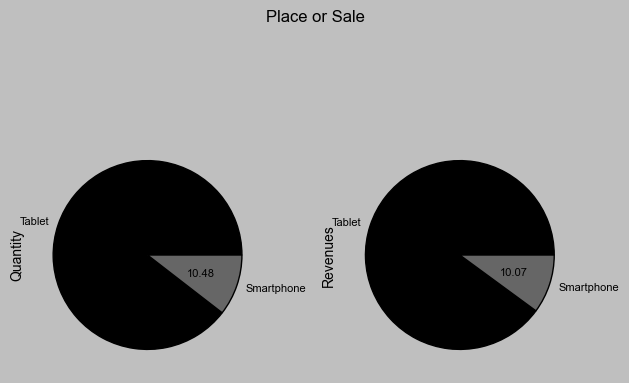

In [65]:
plt.style.use('grayscale')

pie = placesalerevqtty.plot.pie(subplots= True, autopct="%.2f", fontsize=8, legend=False, title='Place or Sale');
plt.tight_layout()


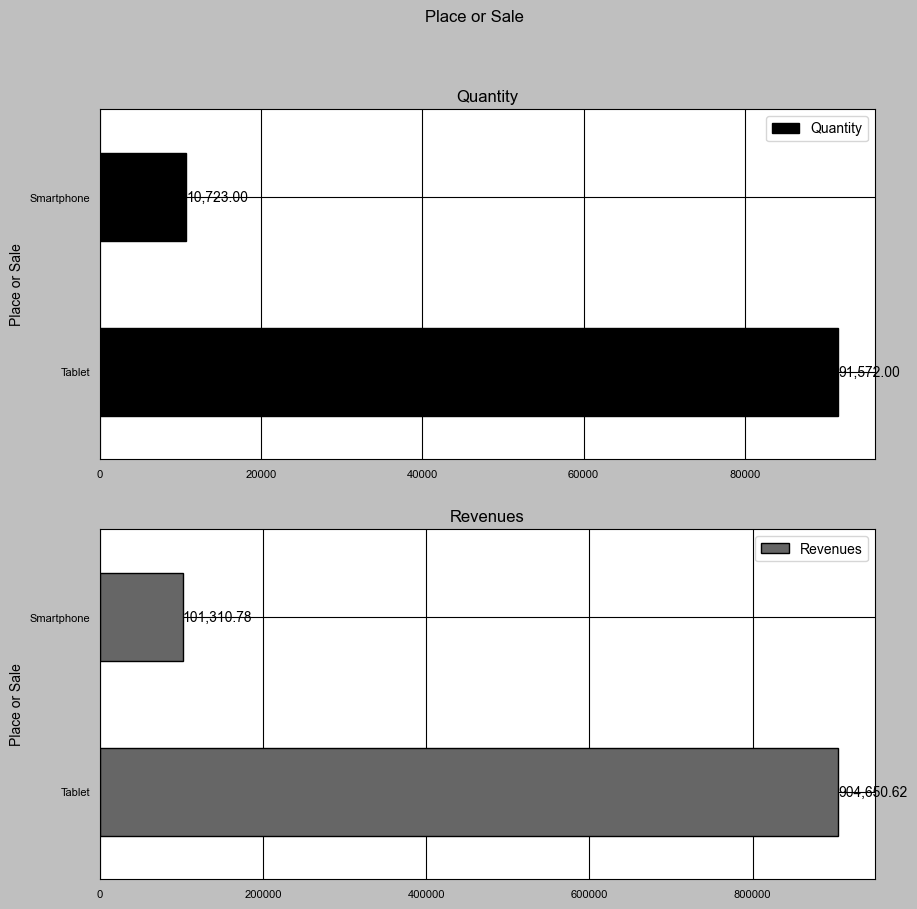

In [66]:
plt.style.use('grayscale')

plot, ax = placesalerevqtty.plot(kind='barh', title ="Place or Sale", figsize=(10, 10), legend=True, fontsize=8, subplots= True, sharex=False);


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.2f}');

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}');




In [67]:
pmttyperevqtty = df.groupby('Payment Type', observed=False).aggregate({'Quantity':'sum', 'Revenues':'sum'})
pmttyperevqtty = pmttyperevqtty.sort_values(by='Revenues', ascending=False)
pmttyperevqtty

,Quantity,Revenues
Payment Type,,
Tablet,84962,838905.125000
APP,10959,103248.164062
Contingency,5997,60284.570312


In [68]:
totalsales = sum(pmttyperevqtty['Revenues'])
totalsales

1002437.859375

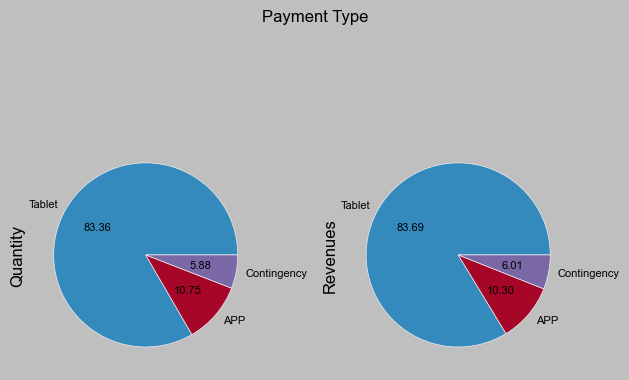

In [69]:
plt.style.use('bmh')

pie = pmttyperevqtty.plot.pie(subplots= True, autopct="%.2f", fontsize=8, legend=False, title ='Payment Type');
plt.tight_layout()


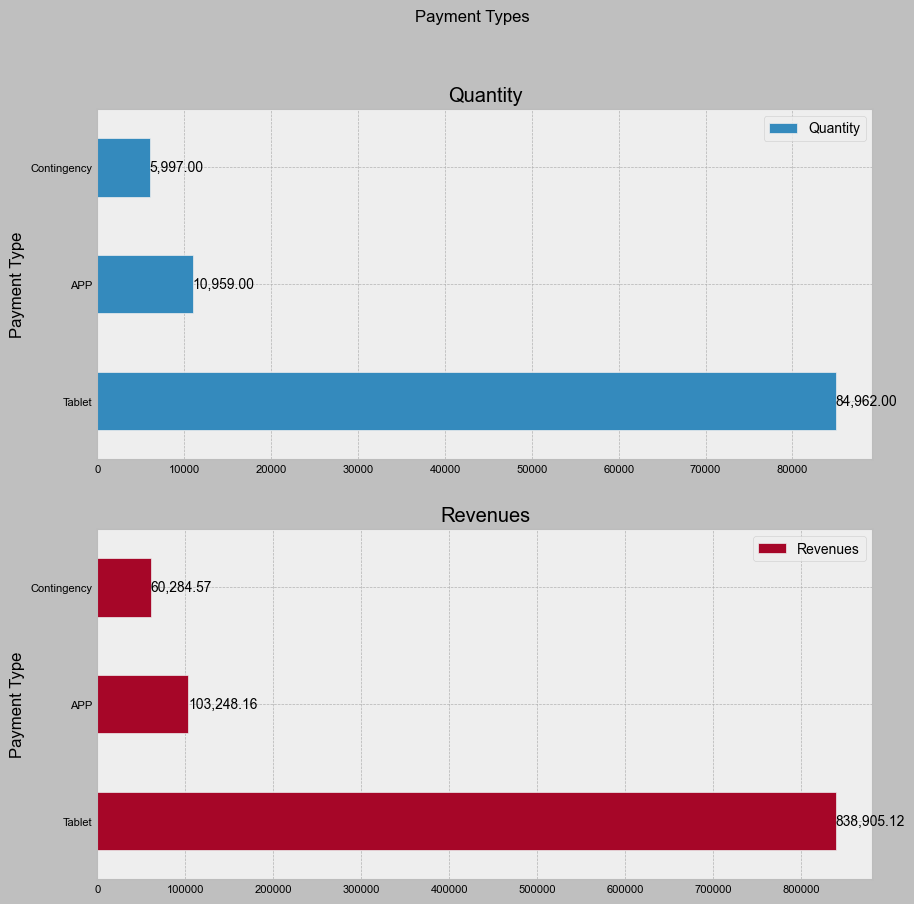

In [70]:
plt.style.use('bmh')


plot, ax = pmttyperevqtty.plot(kind='barh', title ="Payment Types", figsize=(10, 10), legend=True, fontsize=8, subplots= True, sharex=False);


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.2f}');

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}');


In [71]:
pmtmethodrevqtty = df.groupby('Payment Method', observed='False').aggregate({'Quantity':'sum', 'Revenues':'sum'})
pmtmethodrevqtty = pmtmethodrevqtty.sort_values(by='Revenues', ascending=False)
pmtmethodrevqtty

,Quantity,Revenues
Payment Method,,
Tablet - Card,25519,269582.156250
APP - Card,3787,39361.191406
Tablet - Pix,2115,23668.550781
APP - Wallet,1766,15202.459961
Contingency - Money,679,6208.890137
APP - PIX,471,5426.020020
Contingency - Card,492,5400.990234
Contingency - Ifood,389,5155.020020
Contingency - PIX,131,1544.239990


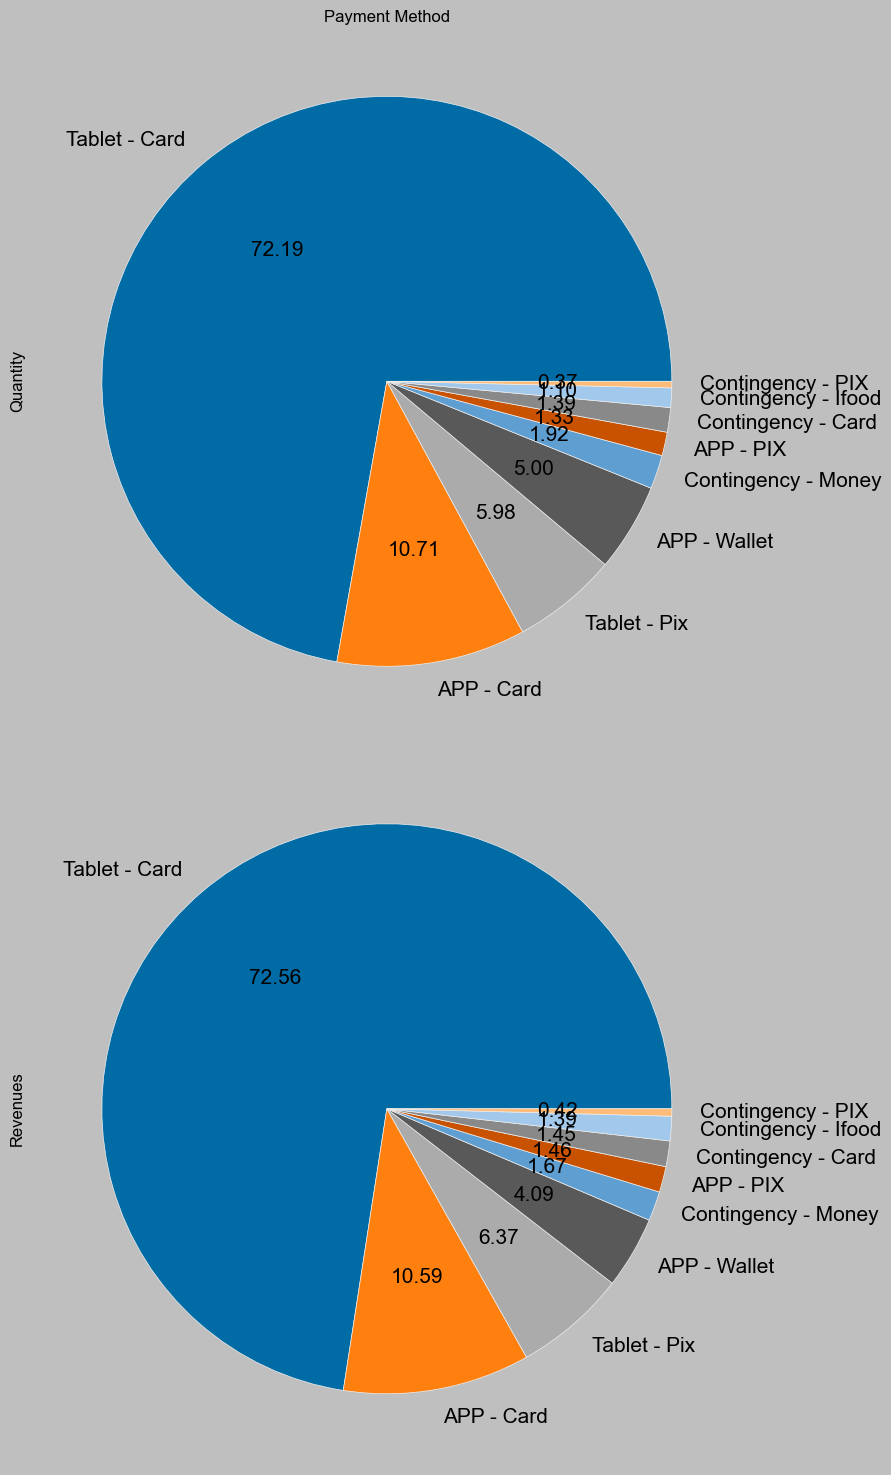

In [72]:
plt.style.use('tableau-colorblind10')

pie = pmtmethodrevqtty.plot.pie(subplots= True, autopct="%.2f", fontsize=15, legend=False, title='Payment Method', figsize=(15,15), layout=(2,1));
plt.tight_layout()


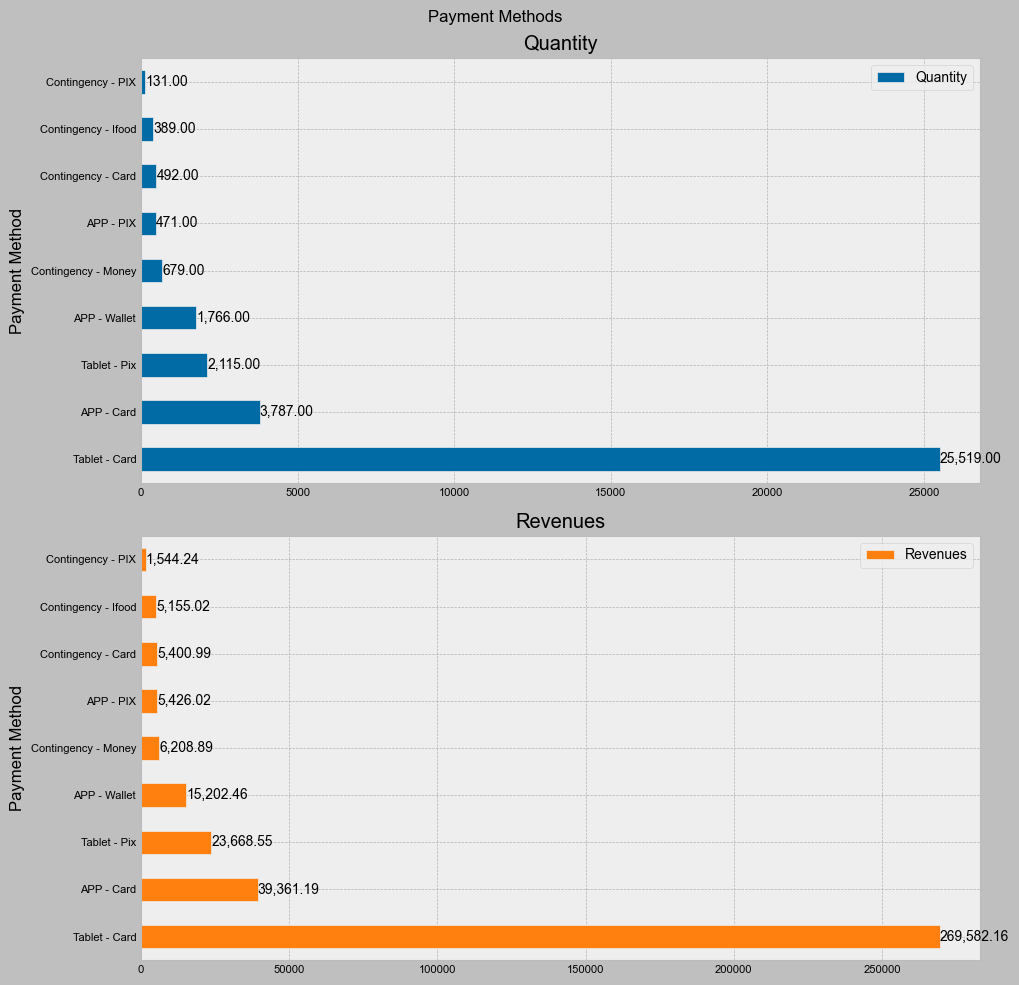

In [73]:
plt.style.use('tableau-colorblind10')

plot, ax = pmtmethodrevqtty.plot(kind='barh', title ="Payment Methods", figsize=(10, 10), legend=True, fontsize=8, subplots= True, sharex=False);
plt.tight_layout()


#showing bar values
for container in plot.containers:
    plot.bar_label(container, fmt='{:,.2f}');

for container in ax.containers:
    ax.bar_label(container, fmt='{:,.2f}');




In [74]:
totalsales = sum(pmtmethodrevqtty['Revenues'])
totalsales

371549.5187988281

## Mas o que aconteceu com as variáveis Payment Type e Payment Method?

In [76]:
#Por que tantos nulos em Payment Method?
paymentMethodAcrossTime = df.pivot_table(index=['year', 'month_of_year'], columns='Payment Method', values='Quantity', aggfunc='sum', fill_value= 0);
paymentMethodAcrossTime

Payment Method      APP - Card  APP - PIX  APP - Wallet  Contingency - Card  \
year month_of_year                                                            
2022 1                       0          0             0                   0   
     2                       0          0             0                   0   
     3                       0          0             0                   0   
     4                       0          0             0                   0   
     5                       0          0             0                   0   
     6                       0          0             0                   0   
     7                       0          0             0                   0   
     8                       0          0             0                   0   
     9                       0          0             0                   0   
     10                      0          0             0                   0   
     11                     92          9            20                   0   
     12                    243         11            51                   0   
2023 1                     231         41           100                   0   
     2                     214         39            74                   0   
     3                     286         48           312                   0   
     4                     488         42           588                   0   
     5                     343         50            61                   0   
     6                     255         31            56                 337   
     7                     324         33            65                  45   
     8                     272         27            61                   0   
     9                     313         42           109                   5   
     10                    236         27            99                  30   
     11                    227         18            65                  53   
     12                    263         53           105                  22   

Payment Method      Contingency - Ifood  Contingency - Money  \
year month_of_year                                             
2022 1                                0                    0   
     2                                0                    0   
     3                                0                    0   
     4                                0                    0   
     5                                0                    0   
     6                                0                    0   
     7                                0                    0   
     8                                0                    0   
     9                                0                    0   
     10                               0                    0   
     11                               0                    0   
     12                               0                    0   
2023 1                                0                    0   
     2                                0                    0   
     3                                0                    0   
     4                                0                    0   
     5                                0                    0   
     6                                0                   44   
     7                                0                  112   
     8                                0                  132   
     9                               23                  103   
     10                              89                   85   
     11                             101                  111   
     12                             176                   92   

Payment Method      Contingency - PIX  Tablet - Card  Tablet - Pix  
year month_of_year                                                  
2022 1                              0              0             0  
     2                              0              0             0  
    

In [ ]:
paymentMethodAcrossTime.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, (2022, 1) to (2023, 12)
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   APP - Card           24 non-null     int64
 1   APP - PIX            24 non-null     int64
 2   APP - Wallet         24 non-null     int64
 3   Contingency - Card   24 non-null     int64
 4   Contingency - Ifood  24 non-null     int64
 5   Contingency - Money  24 non-null     int64
 6   Contingency - PIX    24 non-null     int64
 7   Tablet - Card        24 non-null     int64
 8   Tablet - Pix         24 non-null     int64
dtypes: int64(9)
memory usage: 2.5 KB


In [ ]:
paymentMethodAcrossTime.columns.to_list

<bound method IndexOpsMixin.tolist of CategoricalIndex(['APP - Card', 'APP - PIX', 'APP - Wallet',
                  'Contingency - Card', 'Contingency - Ifood',
                  'Contingency - Money', 'Contingency - PIX', 'Tablet - Card',
                  'Tablet - Pix'],
                 categories=['APP - Card', 'APP - PIX', 'APP - Wallet', 'Contingency - Card', ..., 'Contingency - Money', 'Contingency - PIX', 'Tablet - Card', 'Tablet - Pix'], ordered=False, dtype='category', name='Payment Method')>

In [ ]:
df.loc[::,'month_of_year'] = df['month_of_year'].apply(lambda x: '{0:0>2}'.format(x))

In [ ]:

yearmonth = df['year'].astype('str')+'-'+df['month_of_year'].astype('str')
yearmonth = yearmonth.unique()
yearmonth = sorted(yearmonth)
yearmonth


['2022-01',
 '2022-02',
 '2022-03',
 '2022-04',
 '2022-05',
 '2022-06',
 '2022-07',
 '2022-08',
 '2022-09',
 '2022-10',
 '2022-11',
 '2022-12',
 '2023-01',
 '2023-02',
 '2023-03',
 '2023-04',
 '2023-05',
 '2023-06',
 '2023-07',
 '2023-08',
 '2023-09',
 '2023-10',
 '2023-11',
 '2023-12']

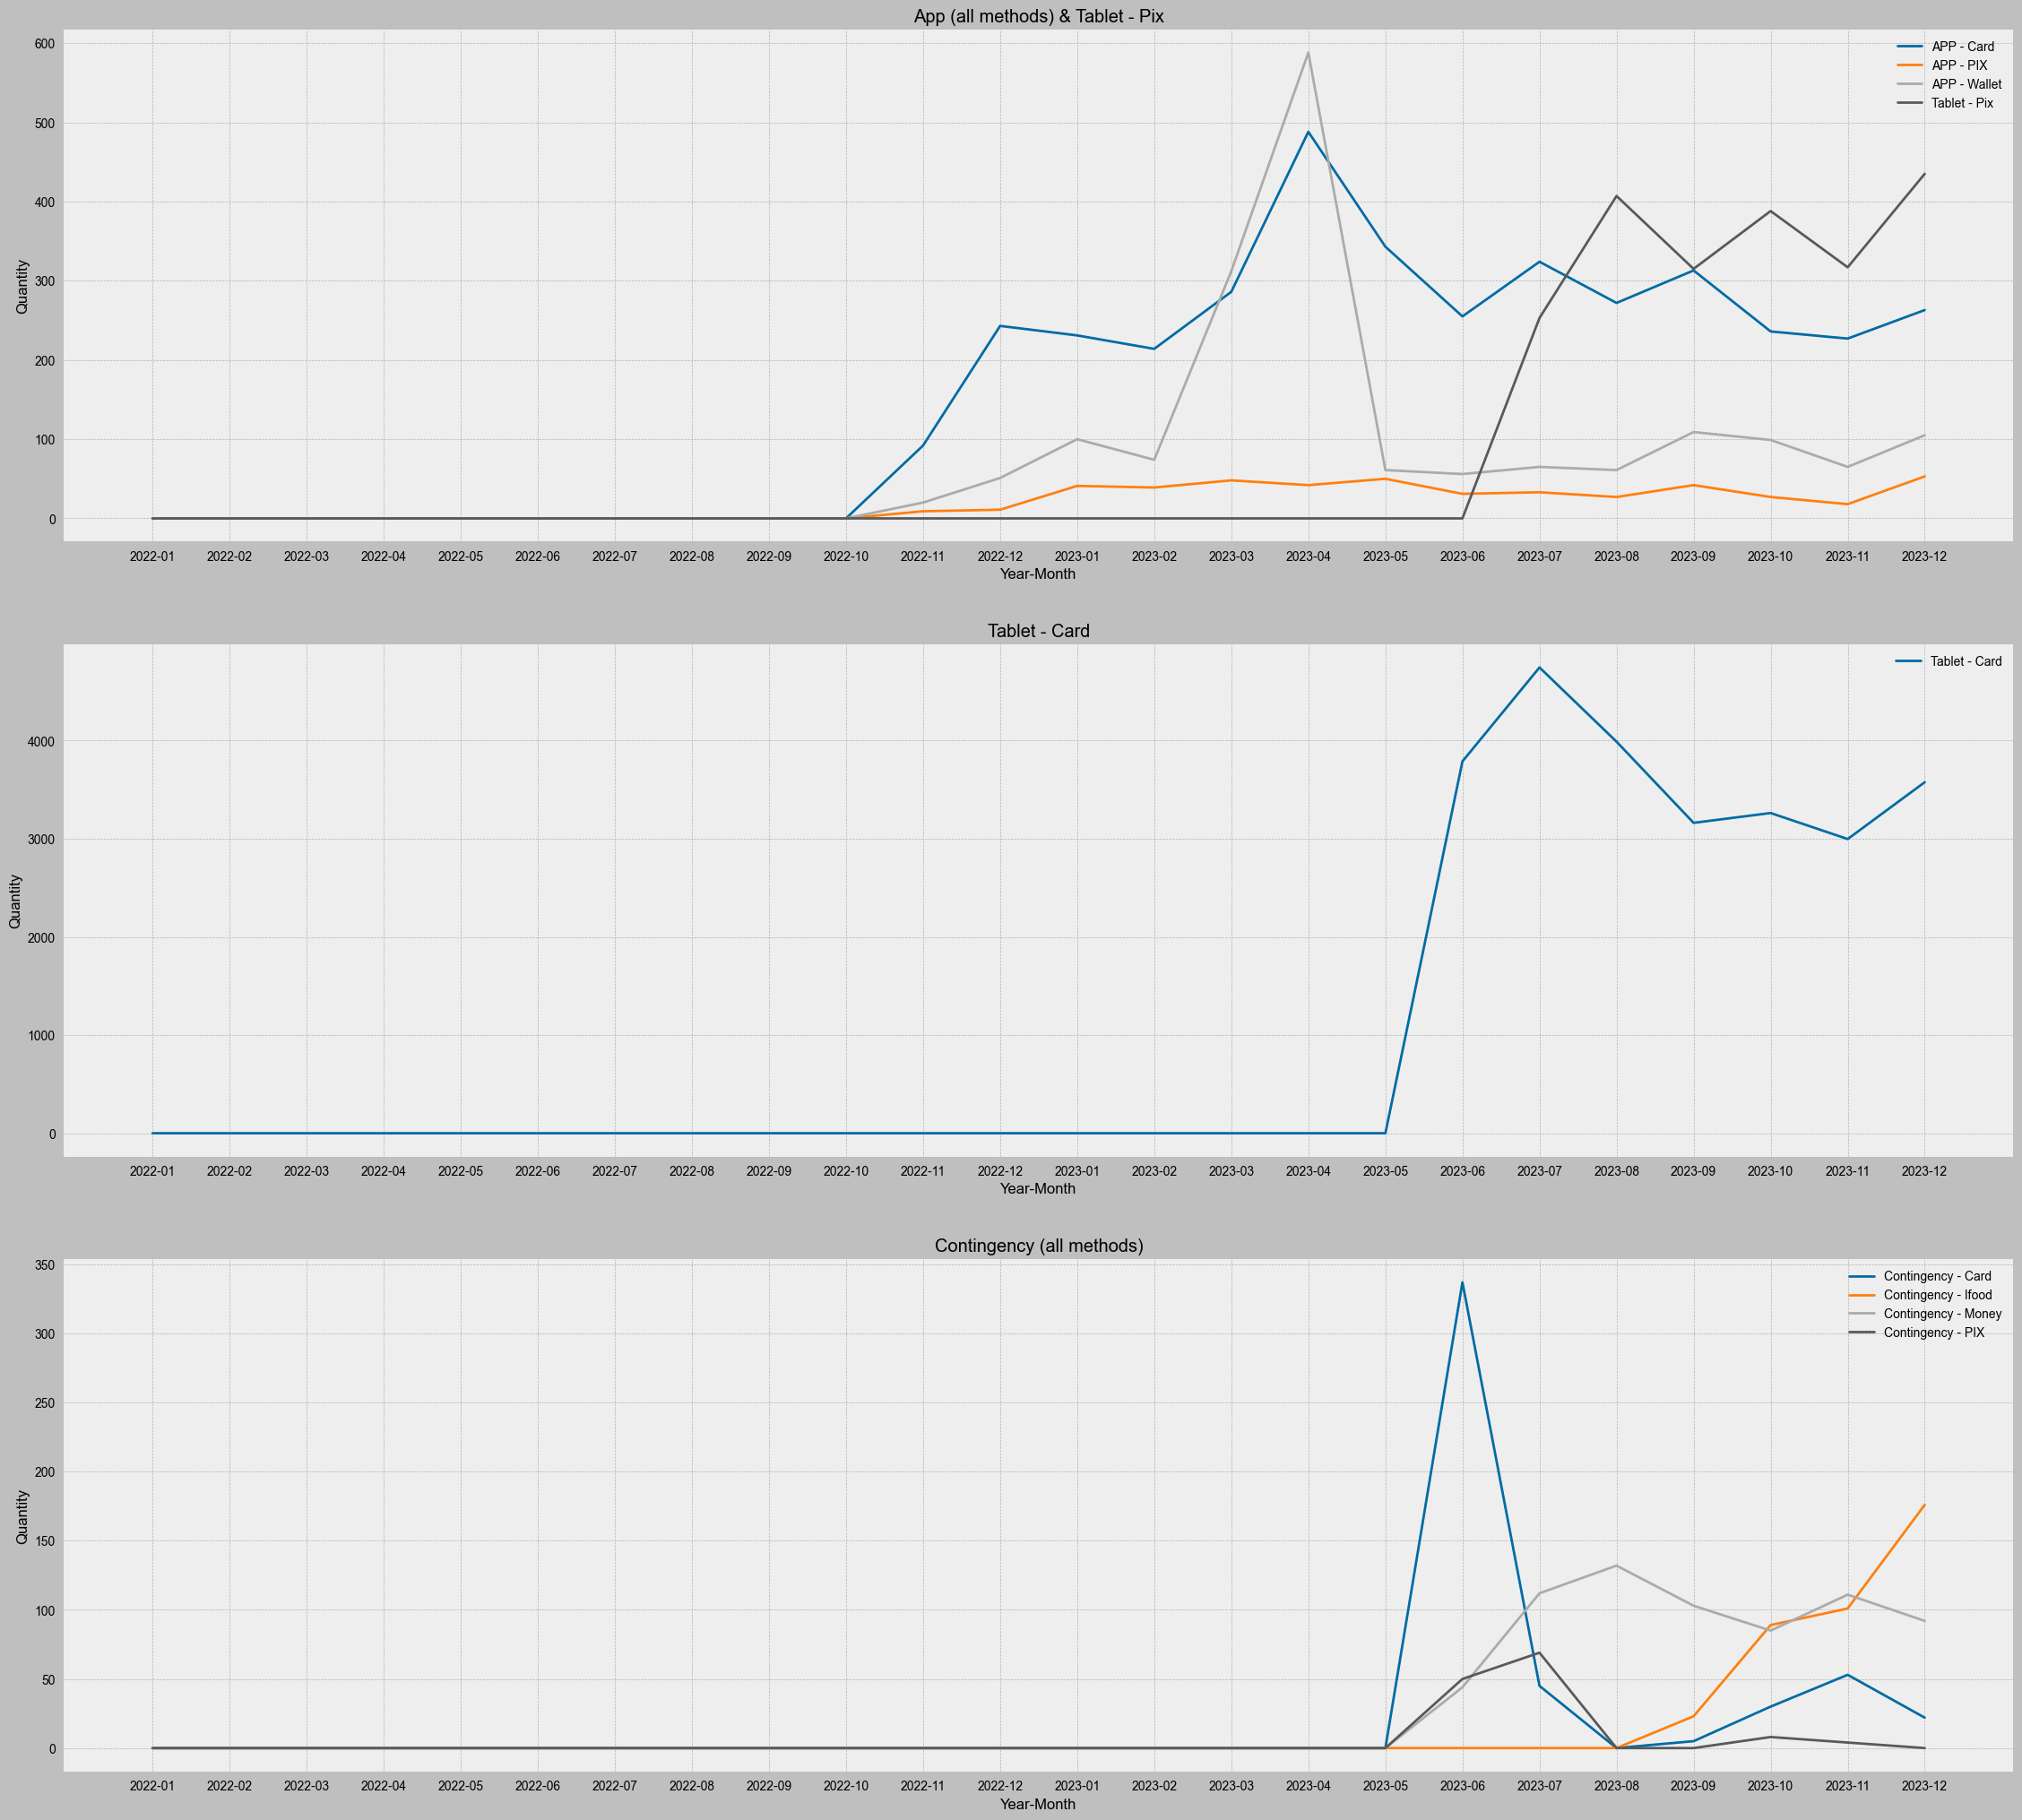

In [ ]:
#resultado gráfico
x = yearmonth
y1 = paymentMethodAcrossTime[['APP - Card', 'APP - PIX', 'APP - Wallet', 'Tablet - Pix']]
y2 = paymentMethodAcrossTime['Tablet - Card'].to_frame()
y3 = paymentMethodAcrossTime[['Contingency - Card', 'Contingency - Ifood', 'Contingency - Money', 'Contingency - PIX']]

# Create a figure and a set of subplots
fig, axes = plt.subplots(figsize=(25,24), nrows=3, ncols=1)

# plt.subplot(nrows, ncols, plot_number)
plt.subplot(3,1,1)
plt.plot(x, y1)
plt.legend(labels=y1)
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.title('App (all methods) & Tablet - Pix')

plt.subplot(3,1,2)
plt.plot(x, y2)
plt.legend(labels=y2)
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.title('Tablet - Card')

plt.subplot(3,1,3)
plt.plot(x, y3)
plt.legend(labels=y3)
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.title('Contingency (all methods)')

plt.show()


In [ ]:
paymentTypeAcrossTime = df.pivot_table(index=['year', 'month_of_year'], columns='Payment Type', values='Quantity', aggfunc='sum')
paymentTypeAcrossTime

Payment Type         APP  Contingency  Tablet
year month_of_year                           
2022 01              667           35    2775
     02              298          117    2566
     03              471          185    3650
     04              540          164    3019
     05              644          213    3499
     06              475          232    3060
     07              524          338    3458
     08              425          227    3110
     09              393          312    3112
     10              388          293    3275
     11              231          267    2679
     12              305          299    3812
2023 01              372          333    3976
     02              327          287    3504
     03              646          338    3942
     04             1118          297    3999
     05              454          368    3845
     06              342          432    3835
     07              422          226    4998
     08              360          132    4396
     09              464          131    3477
     10              362          212    3650
     11              310          269    3314
     12              421          290    4011

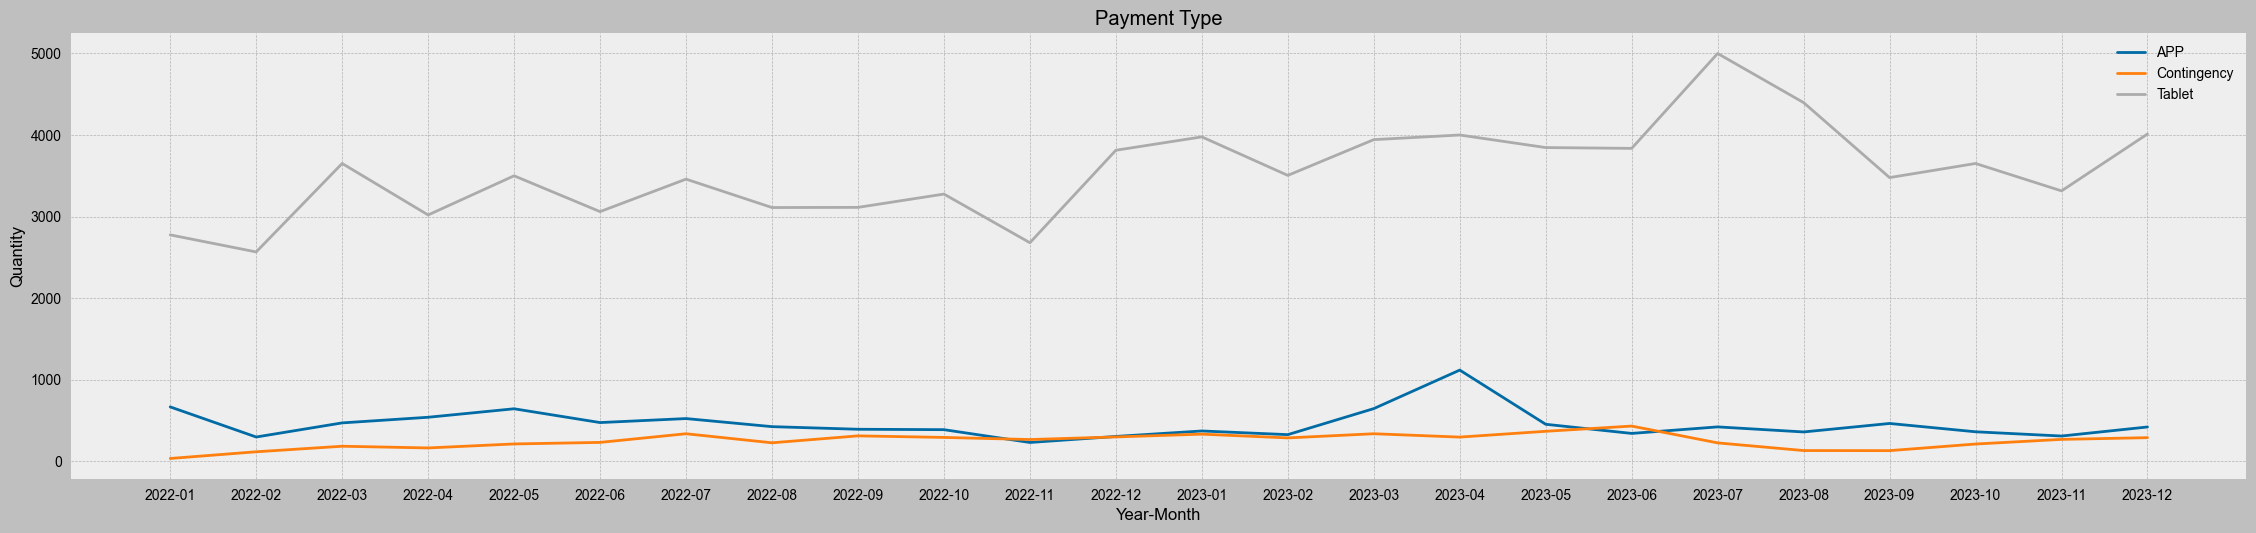

In [ ]:
#resultado gráfico
x = yearmonth
y = paymentTypeAcrossTime

# Create a figure and a set of subplots
plt.figure().set_figwidth(25)
plt.plot(x, y);
plt.legend(labels=y)
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.title('Payment Type');